# 🚀 GST Analytics Hackathon Project

Welcome to my project submission for the **GST Analytics Hackathon**! This project aims to develop an innovative predictive model that can accurately classify entities within the GST system. Leveraging cutting-edge techniques in machine learning, this project addresses a complex binary classification problem using a large dataset provided by the GST Analytics team.

## 📁 Project Overview

- **Objective**: To create a supervised learning model that predicts whether a specific entity is classified as "0" or "1" based on various features.
- **Dataset**: The dataset contains 9 lakh records with 23 attributes, spread over training and testing sets.
- **Methodology**: The project involves data preprocessing, feature engineering, model training, and evaluation using various performance metrics.
- **Tools & Technologies**: Python, scikit-learn, XGBoost, Pandas, Optuna and more.

## 🔍 Key Evaluation Metrics

- **Accuracy**
- **Precision**
- **Recall**
- **F1 Score**
- **AUC-ROC Curve**
- **Confusion Matrix**

## 🌟 Why This Project?

This project not only showcases my technical skills in data science but also contributes to the development of solutions that can enhance the efficiency of the GST system in India.

Let's dive in! 💡


## Importing libraries, data and getting started

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import kaleido
import plotly.io as pio
pio.renderers.default = "png"
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier, StackingClassifier

from sklearn import metrics

from collections import Counter

import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)

import joblib
import os

seed = 0
np.random.seed(0)

In [2]:
xtrain = pd.read_csv('data/X_Train_Data_Input.csv')
xtest  = pd.read_csv('data/X_Test_Data_Input.csv')
ytrain = pd.read_csv('data/Y_Train_Data_Target.csv')
ytest  = pd.read_csv('data/Y_Test_Data_Target.csv')

## EDA For X Train

In [3]:
xtrain_id = xtrain['ID'] # Storing ID for later use
ytrain_id = ytrain['ID'] # Storing ID for later use
xtest_id = xtest['ID']   # Storing ID for later use
ytest_id = ytest['ID']   # Storing ID for later use

xtrain.drop(columns = ['ID'], inplace=True) # Dropping ID column for EDA + Modelling purpose
ytrain.drop(columns = ['ID'], inplace=True) # Dropping ID column for EDA + Modelling purpose
xtest.drop(columns = ['ID'], inplace=True)  # Dropping ID column for EDA + Modelling purpose
ytest.drop(columns = ['ID'], inplace=True)  # Dropping ID column for EDA + Modelling purpose


In [5]:
xtrain.head(10).T

,0,1,2,3,4,5,6,7,8,9
Column0,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
Column1,2495.000000,2495.000000,2495.000000,211.000000,718.000000,886.000000,2495.000000,2495.000000,657.000000,647.000000
Column2,3726.000000,3454.000000,4543.000000,59.000000,950.000000,2842.000000,2612.000000,3053.000000,137.000000,1678.000000
Column3,0.678139,0.452580,-1.577453,NaN,-2.028572,-1.126335,-2.028572,0.678139,-0.404545,-2.028572
Column4,0.701403,0.701403,-1.429540,NaN,-1.855728,-1.216445,-1.855728,0.701403,-0.321449,-1.571603
Column5,-0.007468,-0.007468,-0.007469,NaN,NaN,-0.007469,-0.007468,-0.007468,-0.007467,-0.007469
Column6,0.434190,1.554998,-0.407939,-0.407939,-0.407939,-0.407939,-0.402851,-0.094001,-0.407939,-0.407939
Column7,-0.015603,-0.015574,-0.015607,-0.015607,-0.015607,-0.015607,-0.015607,-0.015605,-0.015607,-0.015607
Column8,0.606265,0.329946,-0.774979,-0.774979,-0.774979,-0.774979,0.673163,0.136592,0.634026,-0.774979
Column9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
round(xtrain.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
Column0,785124.0,0.44,1.16,0.00,0.00,0.00,0.00,18.00
Column1,785133.0,1321.79,907.27,-1080.00,515.00,1173.00,2435.00,2499.00
Column2,785133.0,2951.28,2143.14,-47.00,1129.00,2709.00,4472.00,10290.00
Column3,658830.0,-0.00,1.00,-2.03,-0.68,0.68,0.68,0.68
Column4,657423.0,-0.00,1.00,-1.86,-0.58,0.70,0.70,0.70
Column5,617953.0,-0.00,1.02,-0.01,-0.01,-0.01,-0.01,551.42
Column6,781283.0,-0.00,1.00,-0.41,-0.41,-0.41,-0.37,14.99
Column7,785133.0,0.00,1.05,-0.02,-0.02,-0.02,-0.02,201.69
Column8,781283.0,-0.00,1.06,-0.77,-0.77,0.12,0.63,323.99
Column9,52996.0,0.01,1.11,-0.09,-0.09,-0.08,-0.06,133.91


In [7]:
info_xtrain = pd.DataFrame({
    'Num of unique values': xtrain.nunique(),   # Number of unique vales in each column
    'Standard Deviation': round(xtrain.std(), 2), # Standard deviation of each column
    'Varience': round(xtrain.var(), 2), # Variance of each column
    '% of Null values': round(xtrain.isna().mean() * 100, 2),  # Percentage NaN for each column
    '% of unique populated values': round(xtrain.nunique()/(xtrain.shape[0]-xtrain.isna().sum()) * 100) # Percentage oof unique populated values for each column
})
info_xtrain

,Num of unique values,Standard Deviation,Varience,% of Null values,% of unique populated values
Column0,19,1.16,1.35,0.00,0.0
Column1,2564,907.27,823135.16,0.00,0.0
Column2,9424,2143.14,4593049.66,0.00,1.0
Column3,47,1.00,1.00,16.09,0.0
Column4,47,1.00,1.00,16.27,0.0
Column5,148334,1.02,1.03,21.29,24.0
Column6,157264,1.00,1.00,0.49,20.0
Column7,166513,1.05,1.09,0.00,21.0
Column8,355728,1.06,1.12,0.49,46.0
Column9,49650,1.11,1.23,93.25,94.0


In [8]:
traces = {
    'marker_line_width': 1,
     'marker_line_color': 'black'
} # Parameters for visualizations

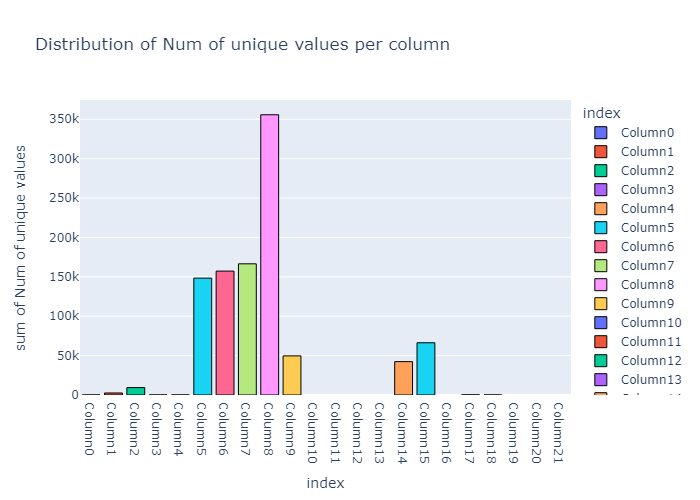

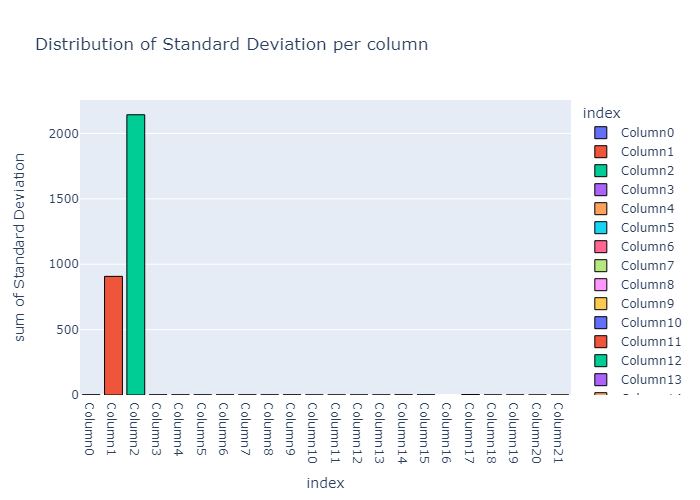

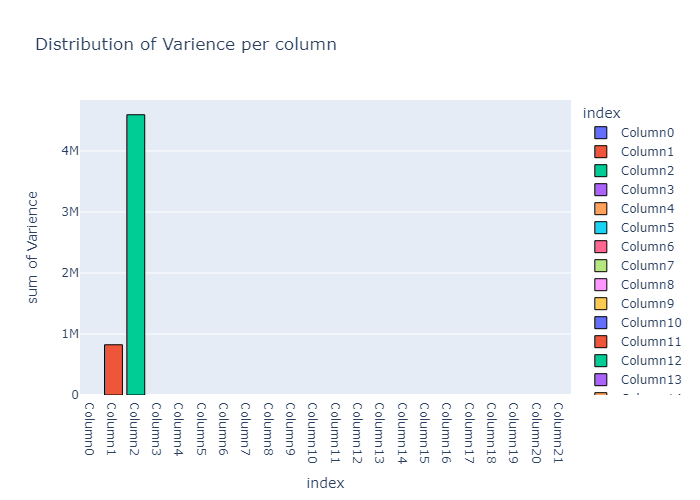

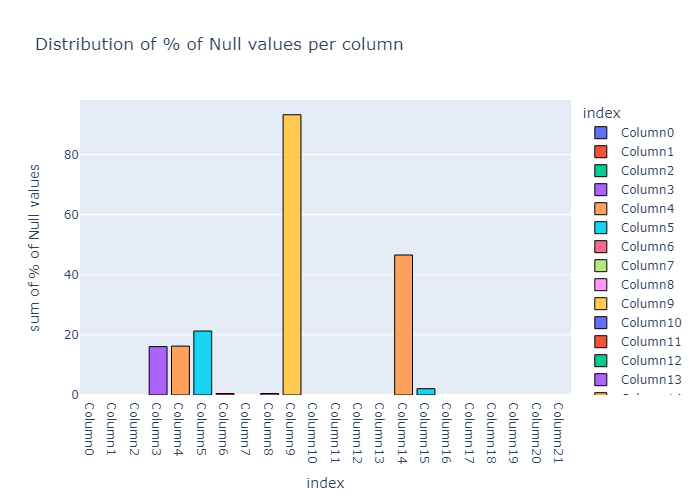

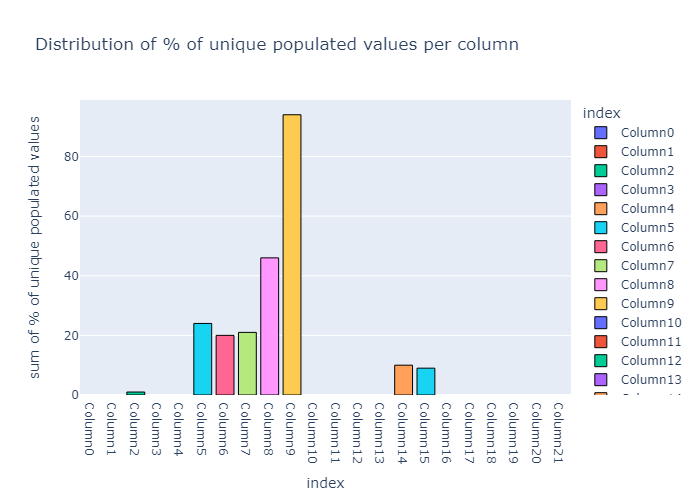

In [9]:
for col in info_xtrain.columns:
    fig = px.histogram(data_frame=info_xtrain, 
                       y = info_xtrain[col], 
                       x = info_xtrain.index,
                       color = info_xtrain.index,
                       title = f'Distribution of {col} per column')
    fig.update_traces(**traces)
    fig.show()

Based on the unique counts and the descriptive analytics of the features, we can infer that: <br><br>
=> Features with low percentage of unique values would be categorical features, and conversly, columns with a higher percentage of unique values would be numeric features.
- Columns `0 - 9 and 14-18` seem to be _numeric features_.
- Columns `10-13 and 19-21` seem to be encoded _categorical features_. 

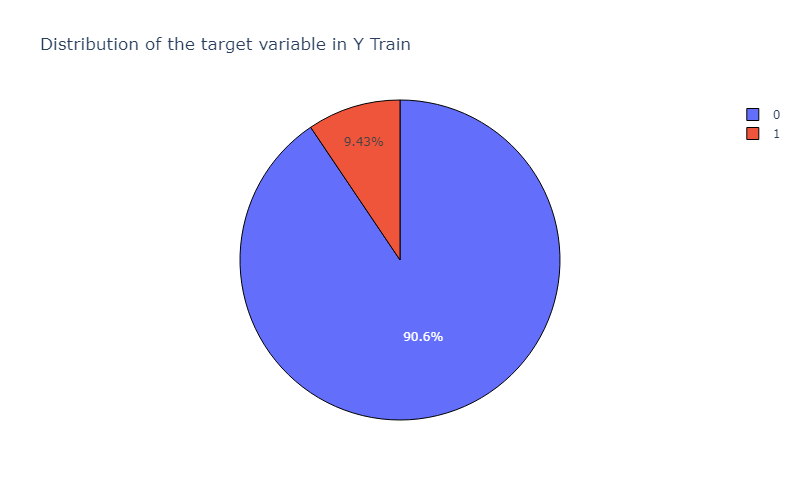

Values in the target variable => 0: 711100, 1: 74033


In [10]:
fig = px.pie(data_frame = ytrain['target'], 
                   names = ytrain['target'], 
                   height = 500, 
                   width = 800, 
                   color = ytrain['target'],
                   title = 'Distribution of the target variable in Y Train')
fig.update_traces(marker_line_width = 1, marker_line_color = 'black')
fig.show()

print(f'Values in the target variable => 0: {Counter(ytrain['target'])[0]}, 1: {Counter(ytrain['target'])[1]}')

### Visualizations for all columns in X Train

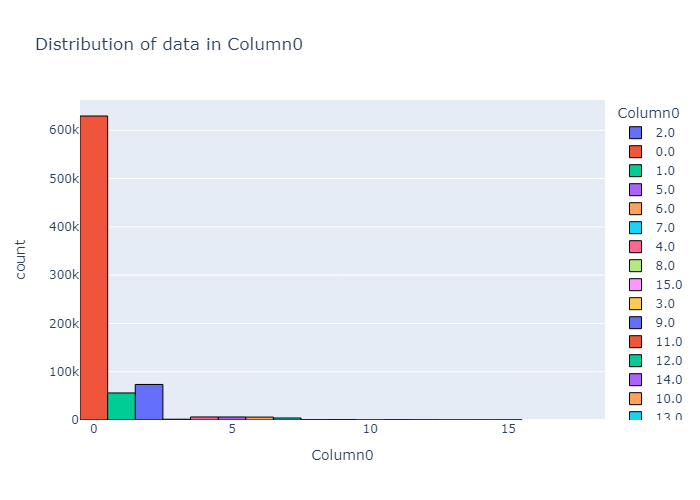

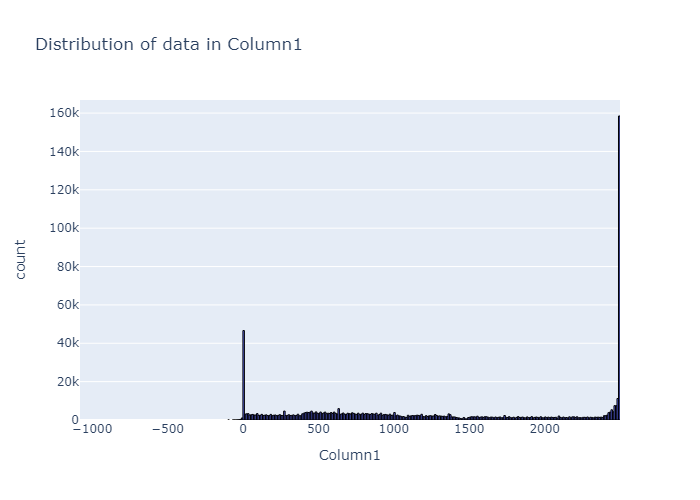

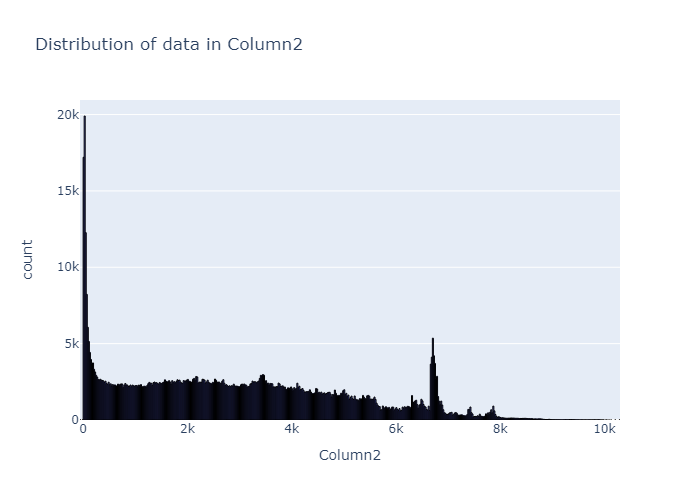

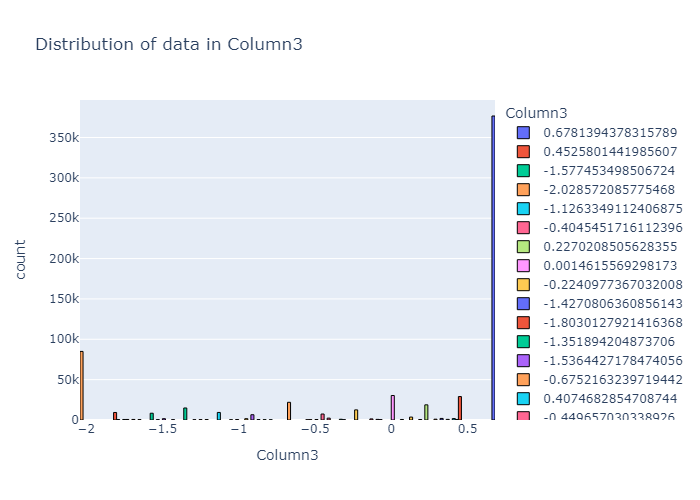

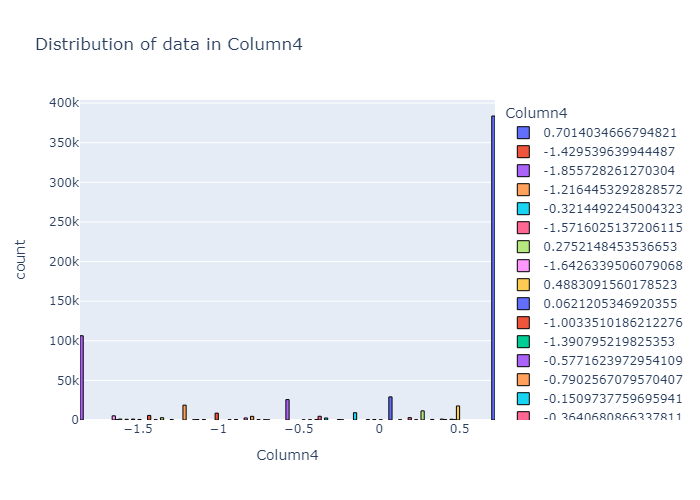

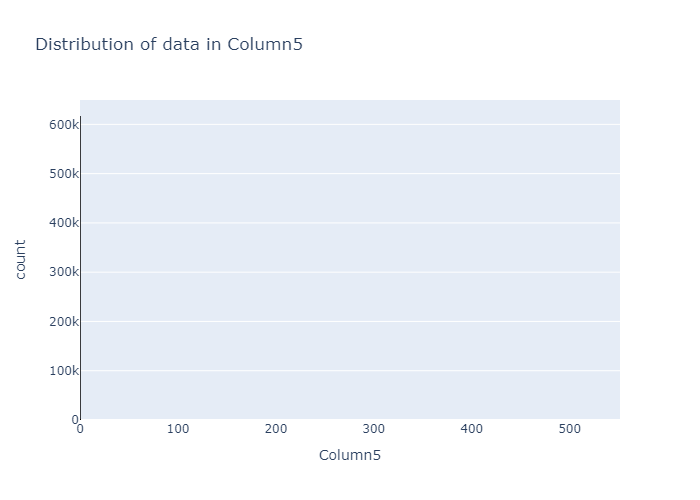

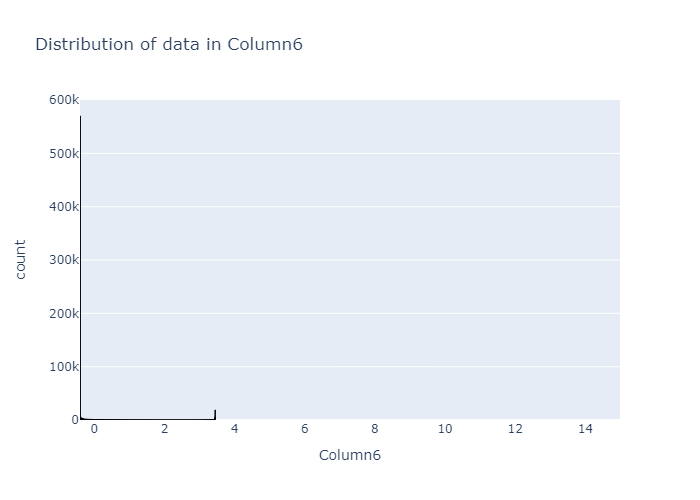

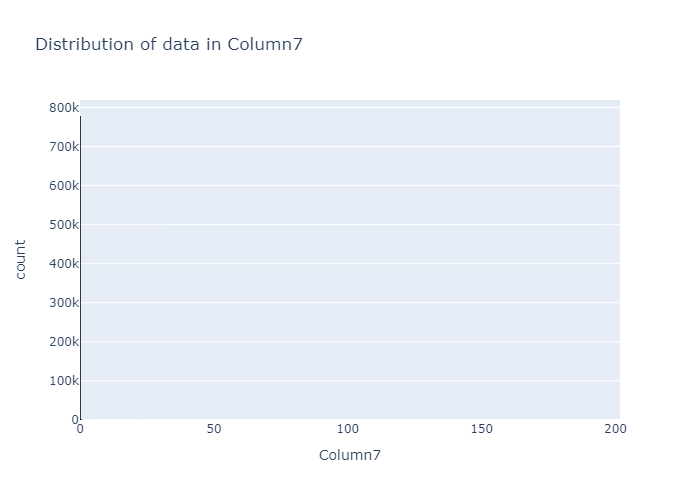

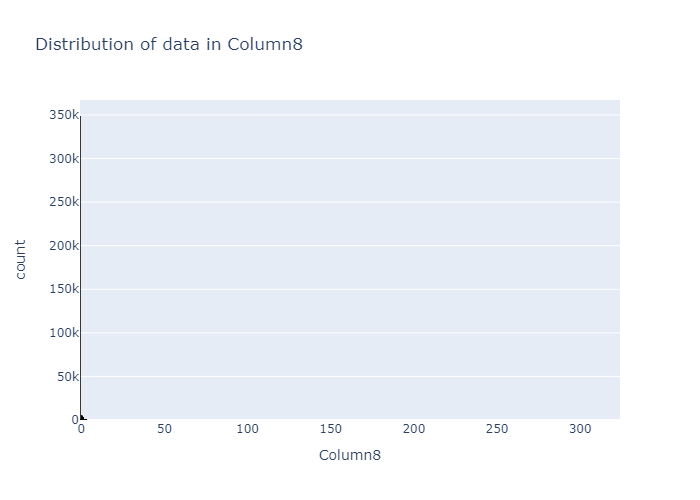

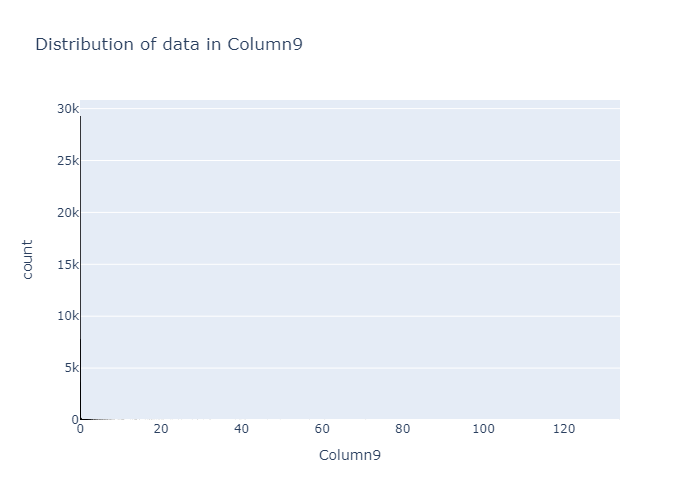

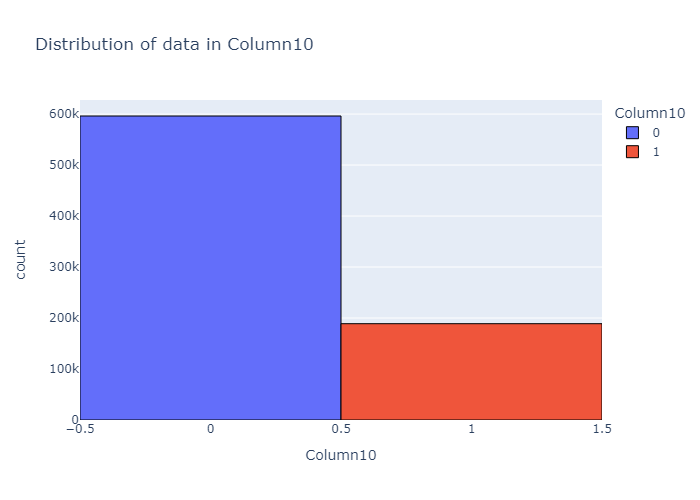

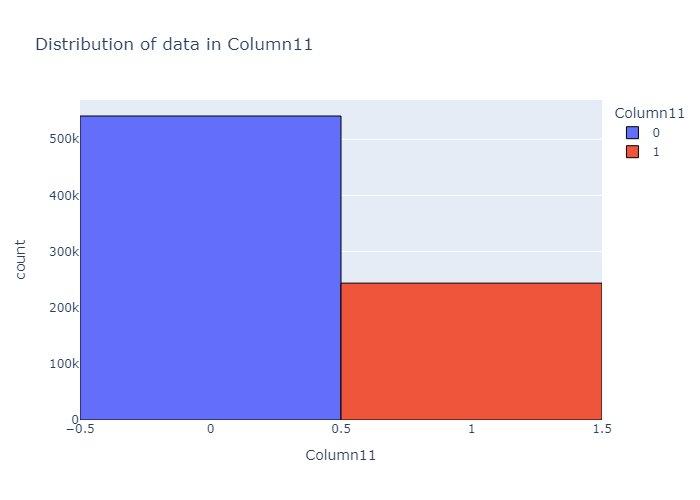

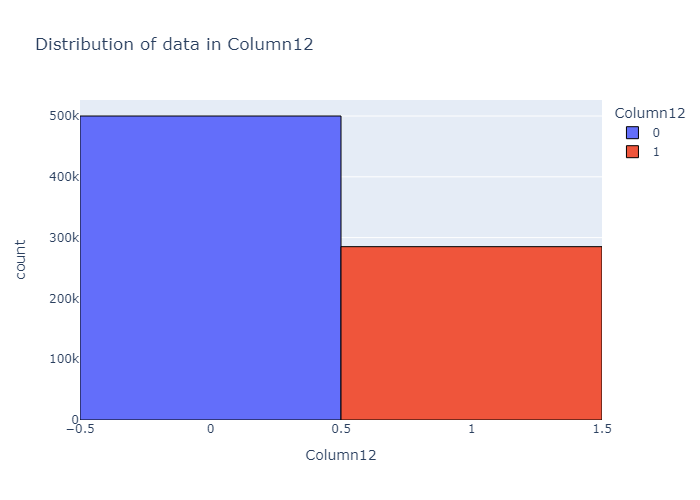

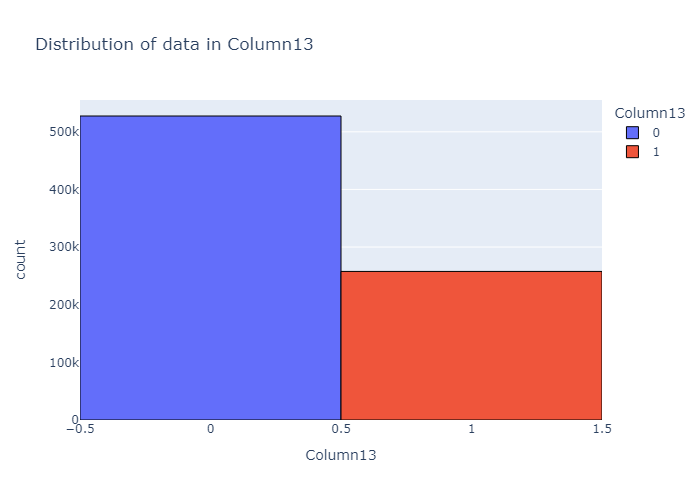

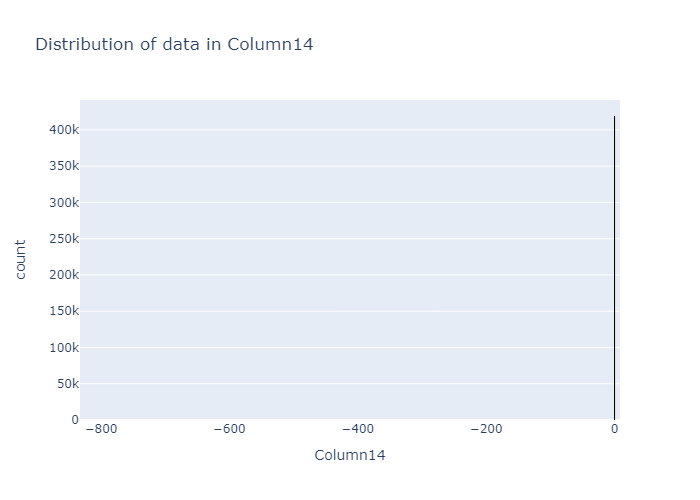

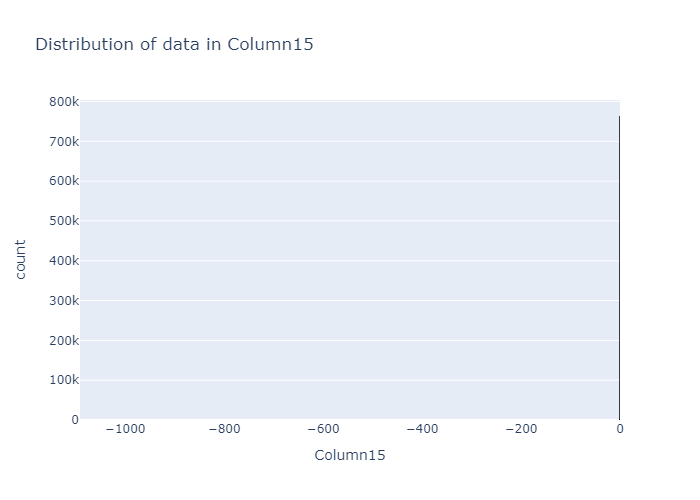

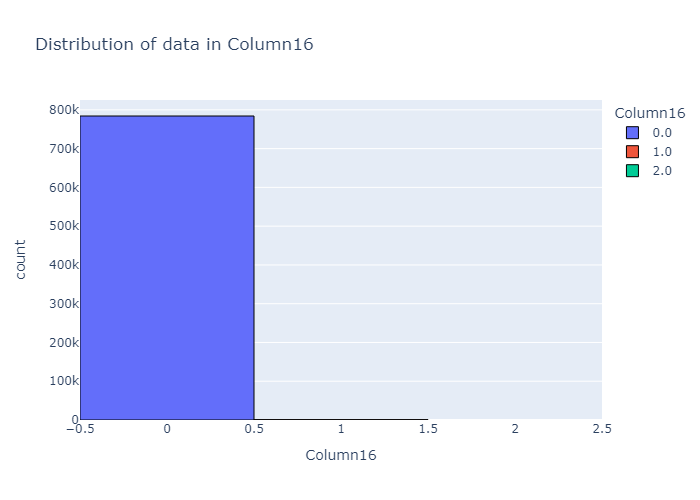

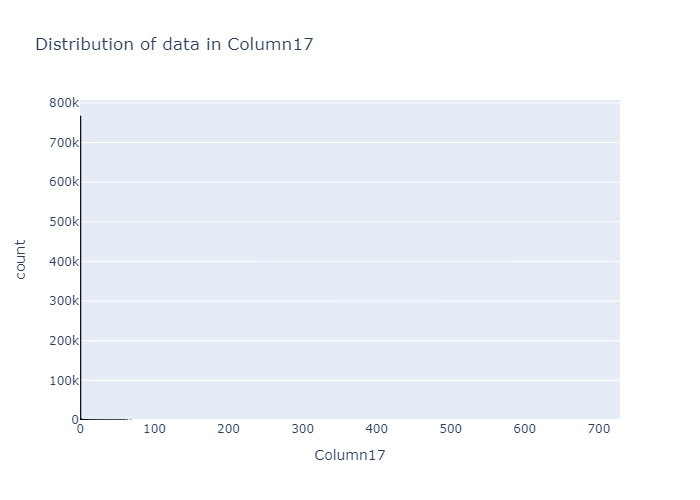

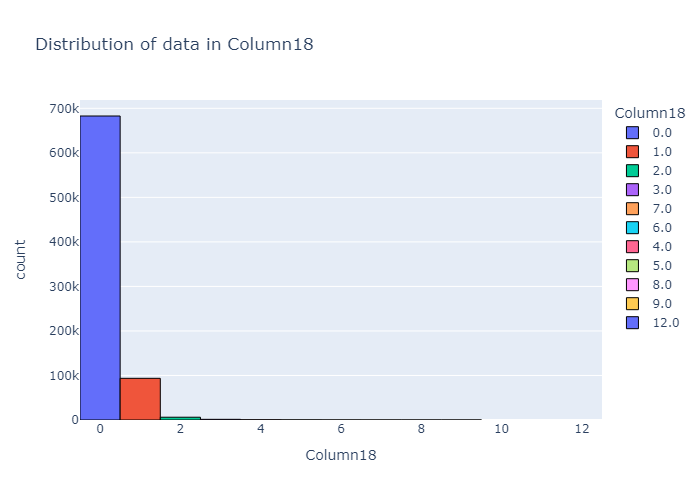

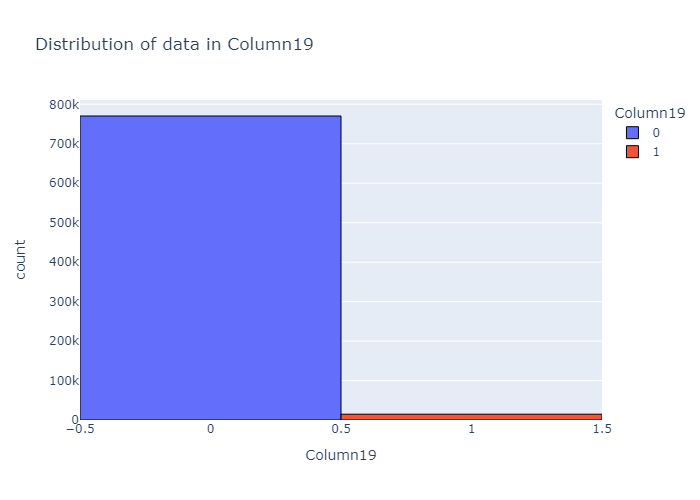

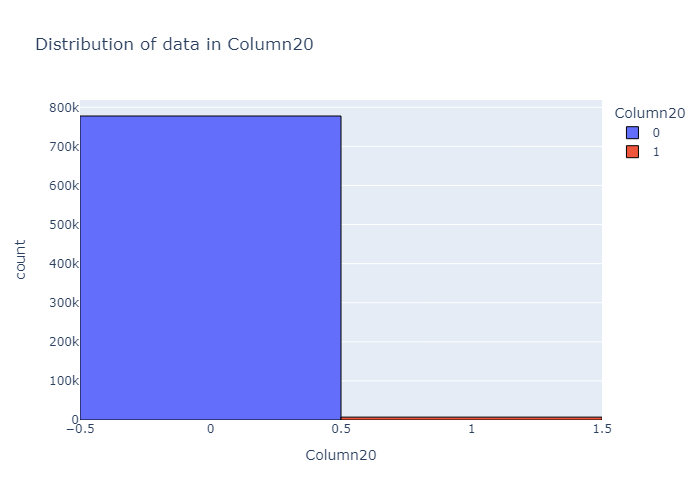

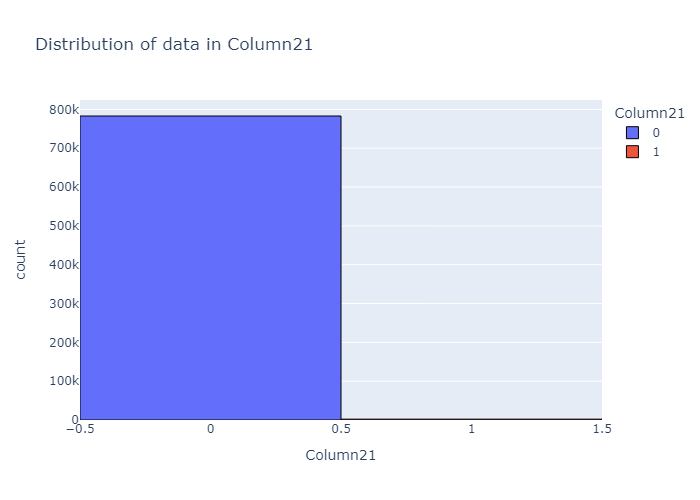

In [11]:
for col in xtrain.columns:
    if xtrain[col].nunique() < 50:
        fig = px.histogram(data_frame=xtrain,
                        x = xtrain[col],
                        color = xtrain[col],
                        title = f'Distribution of data in {col}')
        fig.update_traces(marker_line_color = 'black', marker_line_width = 1)
        fig.show()
    else:
        fig = px.histogram(data_frame=xtrain,
                        x = xtrain[col],
                        title = f'Distribution of data in {col}')
        fig.update_traces(marker_line_color = 'black', marker_line_width = 1)
        fig.show()

- There is a large class imbalance in the target dataset. We will use SMOTE to address this.
- There is also a lot of skew in the training features. We will use robust models to deal with this.

### Data Preprocessing

In [12]:
x_train, x_val, y_train, y_val = train_test_split(xtrain, 
                                                  ytrain, 
                                                  test_size=0.2, 
                                                  stratify = ytrain, 
                                                  random_state=seed) # Creating a stratified validation set

In [13]:
print("Training set class distribution in %:")
print(round(y_train.value_counts(normalize=True), 4)*100)

print("\nValidation set class distributionin %:")
print(round(y_val.value_counts(normalize=True), 4)*100)

Training set class distribution in %:
target
0         90.57
1          9.43
Name: proportion, dtype: float64

Validation set class distributionin %:
target
0         90.57
1          9.43
Name: proportion, dtype: float64


In [14]:
x_val.head()

,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,...,Column12,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21
591545,0.0,426,4231.0,0.227021,0.062121,-0.007469,-0.407939,-0.015607,-0.774979,NaN,...,0,0,NaN,0.00339,0.0,0,0.0,0,0,0
592178,0.0,514,2362.0,0.452580,0.062121,-0.007469,-0.407939,-0.015607,0.192057,NaN,...,0,1,0.001351,0.00339,0.0,0,1.0,0,0,0
475414,0.0,1245,2325.0,-1.577453,-1.429540,-0.007469,-0.407939,-0.015607,-0.774979,NaN,...,0,0,NaN,0.00339,0.0,0,0.0,0,0,0
378155,1.0,2420,23.0,-1.577453,-1.429540,-0.007469,-0.407939,-0.015586,-0.774979,NaN,...,1,1,0.001351,0.00339,0.0,0,1.0,0,0,0
54492,0.0,1004,4182.0,0.678139,0.701403,-0.007468,0.315084,-0.015607,0.443411,NaN,...,0,0,0.001351,0.00339,0.0,0,0.0,0,0,0


In [15]:
y_val.head()

,target
591545,0
592178,1
475414,0
378155,0
54492,0


In [16]:
imputer = IterativeImputer(add_indicator = True, random_state = seed).set_output(transform = 'pandas')

In [17]:
y_train_ravel = np.ravel(y_train)
y_val_ravel = np.ravel(y_val)

In [18]:
model = []
f1_score_vanilla_model = []
n_neighbors = []

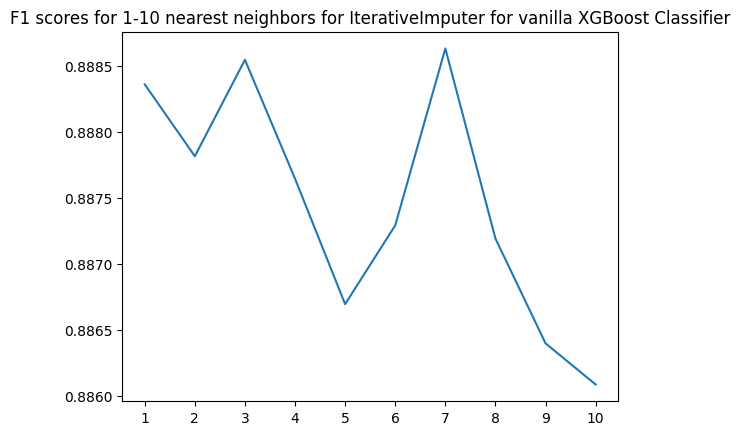

In [19]:
f1_XGB = []
imp_neighbors_XGB = []

model_XGB = XGBClassifier(random_state = seed, n_jobs= - 1)

for num in np.linspace(1, 10, 10, dtype=int):
    
    imputer.set_params(n_nearest_features = num)
    
    x_train_imp = imputer.fit_transform(x_train)
    x_val_imp = imputer.transform(x_val)

    model_XGB.fit(x_train_imp, y_train_ravel)
    model_XGB_pred = model_XGB.predict(x_val_imp)

    f1_score = metrics.f1_score(y_val_ravel, model_XGB_pred)

    f1_XGB.append(f1_score)
    imp_neighbors_XGB.append(num)

sorted_scores = sorted(zip(f1_XGB, imp_neighbors_XGB))

sorted_f1_score = [x[0] for x in sorted_scores]
sorted_neighbors = [y[1] for y in sorted_scores]

ax = sns.lineplot(x = sorted_neighbors, y = sorted_f1_score)
ax.set_xticks(np.linspace(1, 10, 10, dtype=int))
ax.set(title='F1 scores for 1-10 nearest neighbors for IterativeImputer for vanilla XGBoost Classifier')

plt.show()

In [20]:
model.append('XGBoost')
f1_score_vanilla_model.append(max(sorted_scores)[0])
n_neighbors.append(max(sorted_scores)[1])

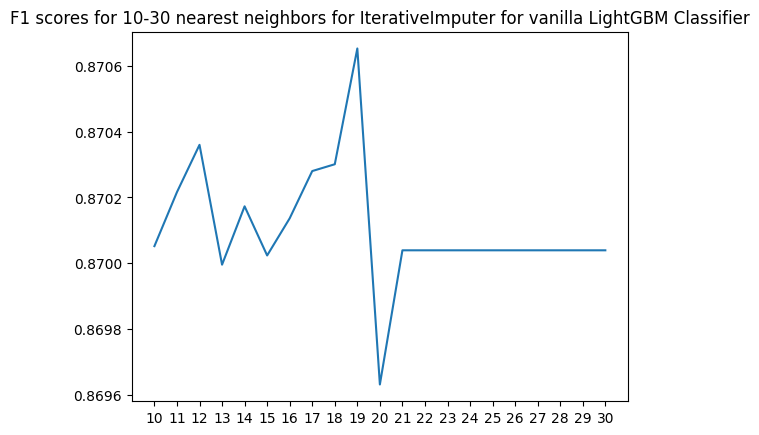

In [43]:
f1_LGBM = []
imp_neighbors_LGBM = []

model_LGBM = LGBMClassifier(random_state = seed, n_jobs= - 1, class_weight = 'balanced', verbose = 0)

for num in range(10, 31):
    
    imputer.set_params(n_nearest_features = num)
    
    x_train_imp = imputer.fit_transform(x_train)
    x_val_imp = imputer.transform(x_val)

    model_LGBM.fit(x_train_imp, y_train_ravel)
    model_LGBM_pred = model_LGBM.predict(x_val_imp)

    f1_score = metrics.f1_score(y_val_ravel, model_LGBM_pred)

    f1_LGBM.append(f1_score)
    imp_neighbors_LGBM.append(num)

sorted_scores = sorted(zip(f1_LGBM, imp_neighbors_LGBM))

sorted_f1 = [x[0] for x in sorted_scores]
sorted_neighbors = [y[1] for y in sorted_scores]

ax = sns.lineplot(x = sorted_neighbors, y = sorted_f1)
ax.set_xticks(range(10, 31))
ax.set(title='F1 scores for 10-30 nearest neighbors for IterativeImputer for vanilla LightGBM Classifier')

plt.show()

In [47]:
model.append('LightGBM')
n_neighbors.append(max(sorted_scores)[1])
f1_score_vanilla_model.append(max(sorted_scores)[0])

Compiling F1 scores in one DataFrame, we get

In [48]:
vanilla_f1_scores = pd.DataFrame({
    'Model': model,
    'n_neighbors': n_neighbors,
    'Score': f1_score_vanilla_model
})

In [67]:
vanilla_f1_scores

,Model,n_neighbors,Score
0,XGBoost,7,0.888631
1,LightGBM,19,0.870653


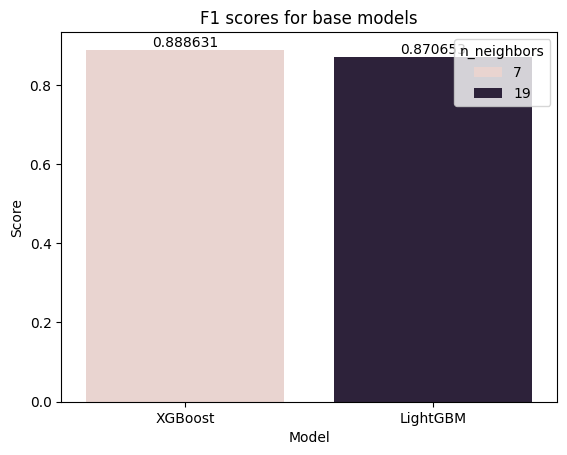

In [70]:
ax = sns.barplot(data=vanilla_f1_scores, 
                  x = vanilla_f1_scores['Model'], 
                  y = vanilla_f1_scores['Score'],
                  hue=vanilla_f1_scores['n_neighbors'])
ax.set(title = 'F1 scores for base models')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

Vanilla **XGBoost model** gives us the better F1 score.

### Metrics on validation set

In [210]:
# metric_list = ['accuracy', 'precision', 'recall', 'f1', 'auc_roc', 'log_loss', 'balanced_accuracy']
model_list = ['XGBoost' ,'LightGBM']

model_list1 = []
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
auc_roc_list = []
log_loss_list = []
balanced_accuracy_list = []

In [211]:
for model_name in model_list:
    
    model_list1.append(model_name)

    if model_name == 'XGBoost':

        imputer.set_params(n_nearest_features = vanilla_f1_scores['n_neighbors'][0])
    
        x_train_imp = imputer.fit_transform(x_train)
        x_val_imp = imputer.transform(x_val)

        model_XGB.fit(x_train_imp, y_train_ravel)
        model_XGB_pred = model_XGB.predict(x_val_imp)
    
        accuracy = metrics.accuracy_score(y_val_ravel, model_XGB_pred)
        accuracy_list.append(accuracy)

        precision = metrics.precision_score(y_val_ravel, model_XGB_pred)
        precision_list.append(precision)

        recall = metrics.recall_score(y_val_ravel, model_XGB_pred)
        recall_list.append(recall)

        f1_score = metrics.f1_score(y_val_ravel, model_XGB_pred)
        f1_list.append(f1_score)

        auc_roc = metrics.roc_auc_score(y_val_ravel, model_XGB_pred) 
        auc_roc_list.append(auc_roc)

        log_loss = metrics.log_loss(y_val_ravel, model_XGB_pred)
        log_loss_list.append(log_loss)

        balanced_accuracy = metrics.balanced_accuracy_score(y_val_ravel, model_XGB_pred)
        balanced_accuracy_list.append(balanced_accuracy)

    elif model_name == 'LightGBM':

        imputer.set_params(n_nearest_features = vanilla_f1_scores['n_neighbors'][1])
    
        x_train_imp = imputer.fit_transform(x_train)
        x_val_imp = imputer.transform(x_val)

        model_LGBM.fit(x_train_imp, y_train_ravel)
        model_LGBM_pred = model_LGBM.predict(x_val_imp)
    
        accuracy = metrics.accuracy_score(y_val_ravel, model_LGBM_pred)
        accuracy_list.append(accuracy)

        precision = metrics.precision_score(y_val_ravel, model_LGBM_pred)
        precision_list.append(precision)

        recall = metrics.recall_score(y_val_ravel, model_LGBM_pred)
        recall_list.append(recall)

        f1_score = metrics.f1_score(y_val_ravel, model_LGBM_pred)
        f1_list.append(f1_score)

        auc_roc = metrics.roc_auc_score(y_val_ravel, model_LGBM_pred) 
        auc_roc_list.append(auc_roc)

        log_loss = metrics.log_loss(y_val_ravel, model_LGBM_pred)
        log_loss_list.append(log_loss)

        balanced_accuracy = metrics.balanced_accuracy_score(y_val_ravel, model_LGBM_pred)
        balanced_accuracy_list.append(balanced_accuracy)

In [218]:
model_scores = pd.DataFrame({
    'Model': model_list,
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1': f1_list,
    'AUC-ROC': auc_roc_list,
    'Log-Loss': log_loss_list,
    'Balanced accuracy': balanced_accuracy_list
})

In [219]:
model_scores

,Model,Accuracy,Precision,Recall,F1,AUC-ROC,Log-Loss,Balanced accuracy
0,XGBoost,0.977762,0.849164,0.929223,0.887391,0.956019,0.801546,0.956019
1,LightGBM,0.971979,0.772221,0.996893,0.870291,0.983139,1.009967,0.983139


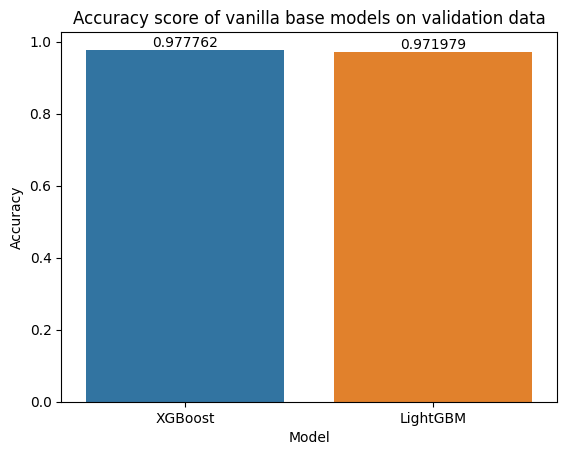

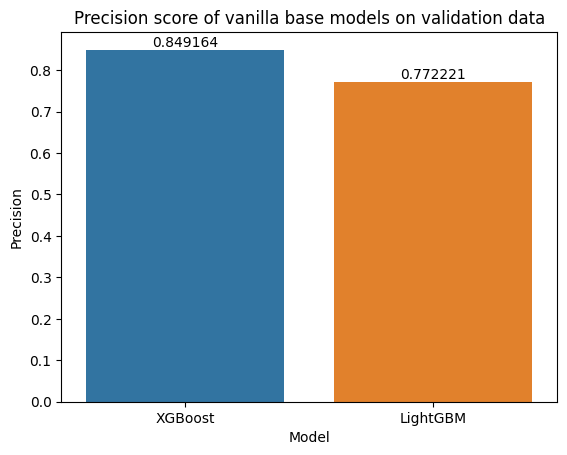

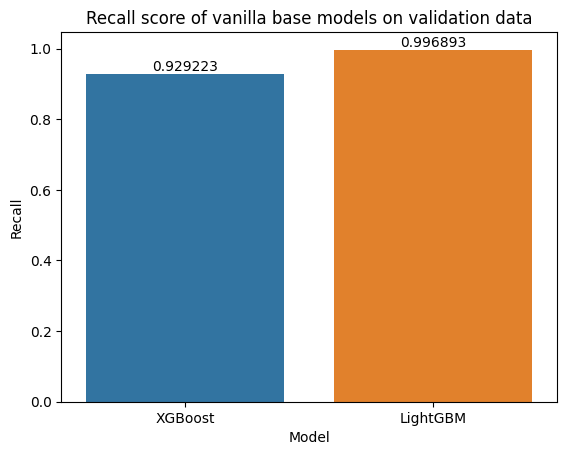

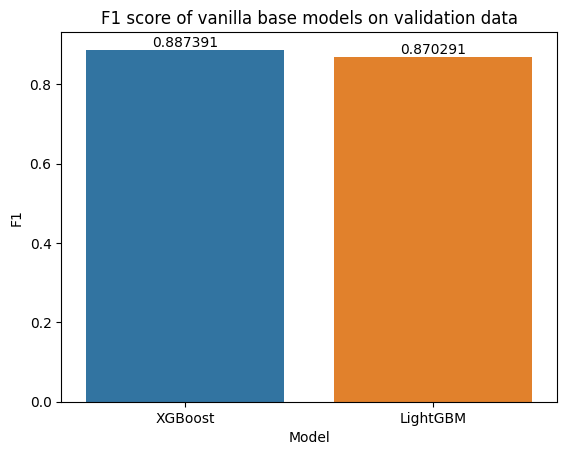

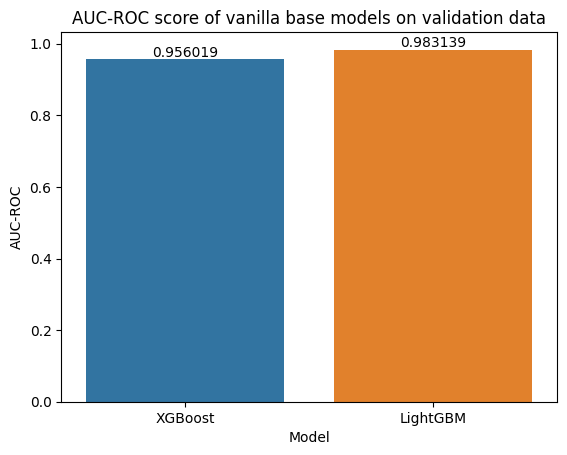

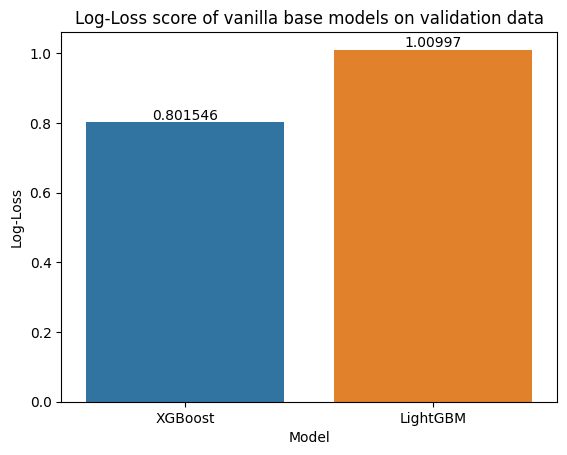

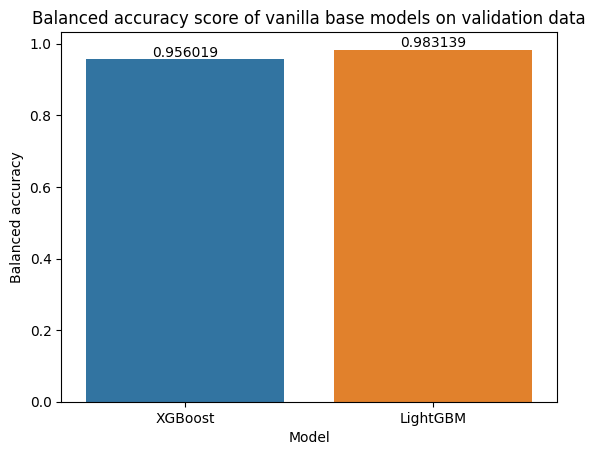

In [222]:
for col in model_scores.columns[1:]:
    ax = sns.barplot(data=model_scores, x = 'Model', y = col, hue = 'Model')
    ax.set_title(f'{col} score of vanilla base models on validation data')
    ax.bar_label(ax.containers[0])
    ax.bar_label(ax.containers[1])
    plt.show()

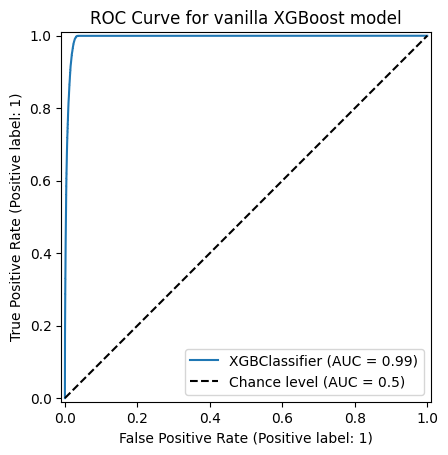

Classification report for vanilla XGBoost: 

               precision    recall  f1-score   support

           0       1.00      0.97      0.98    142220
           1       0.77      1.00      0.87     14807

    accuracy                           0.97    157027
   macro avg       0.89      0.98      0.93    157027
weighted avg       0.98      0.97      0.97    157027



In [207]:
roc_curve_lgbm = metrics.RocCurveDisplay.from_estimator(model_XGB, 
                                                        x_val_imp, 
                                                        y_val_ravel, 
                                                        plot_chance_level=True)
plt.title('ROC Curve for vanilla XGBoost model')
plt.show()

classification_report_XGB = metrics.classification_report(y_val_ravel, model_XGB_pred)
print("Classification report for vanilla XGBoost: \n\n", classification_report_XGB)

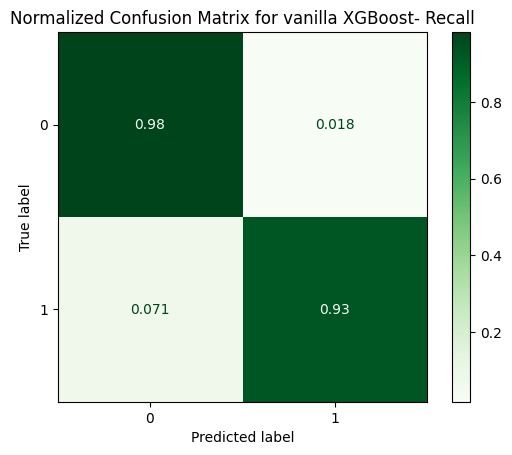

In [226]:
ax = metrics.ConfusionMatrixDisplay.from_estimator(model_XGB, 
                                                   x_val_imp, 
                                                   y_val_ravel,
                                                   normalize='true', 
                                                   cmap = 'Greens')
plt.title('Normalized Confusion Matrix for vanilla XGBoost- Recall')
plt.show()

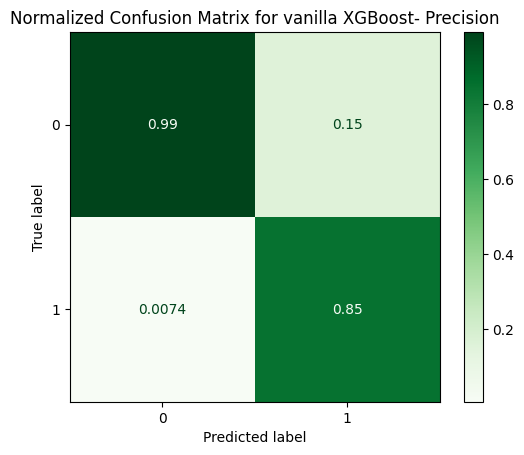

In [227]:
ax = metrics.ConfusionMatrixDisplay.from_estimator(model_XGB, 
                                                   x_val_imp, 
                                                   y_val_ravel,
                                                   normalize='pred', 
                                                   cmap = 'Greens')
plt.title('Normalized Confusion Matrix for vanilla XGBoost- Precision')
plt.show()

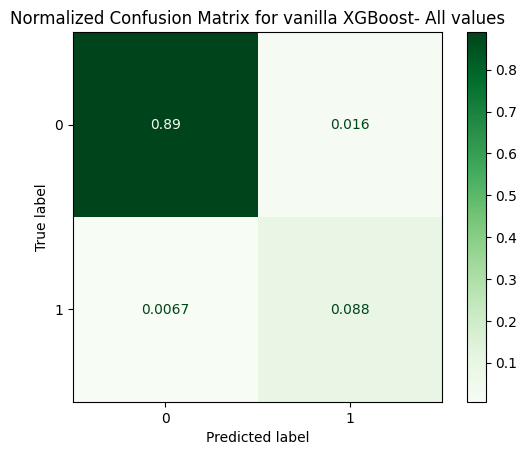

In [224]:
ax = metrics.ConfusionMatrixDisplay.from_estimator(model_XGB, 
                                                   x_val_imp, 
                                                   y_val_ravel,
                                                   normalize='all', 
                                                   cmap = 'Greens')
plt.title('Normalized Confusion Matrix for vanilla XGBoost- All values')
plt.show()

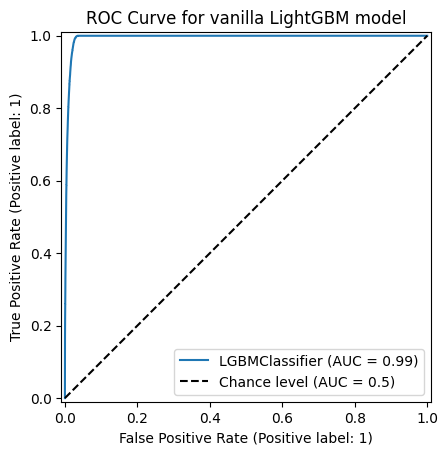

Classification report for vanilla LightGBM:

               precision    recall  f1-score   support

           0       1.00      0.97      0.98    142220
           1       0.77      1.00      0.87     14807

    accuracy                           0.97    157027
   macro avg       0.89      0.98      0.93    157027
weighted avg       0.98      0.97      0.97    157027



In [228]:
roc_curve_lgbm = metrics.RocCurveDisplay.from_estimator(model_LGBM, 
                                                        x_val_imp, 
                                                        y_val_ravel, 
                                                        plot_chance_level=True)
plt.title('ROC Curve for vanilla LightGBM model')
plt.show()

classification_report_LGBM = metrics.classification_report(y_val_ravel, model_LGBM_pred)
print("Classification report for vanilla LightGBM:\n\n", classification_report_LGBM)

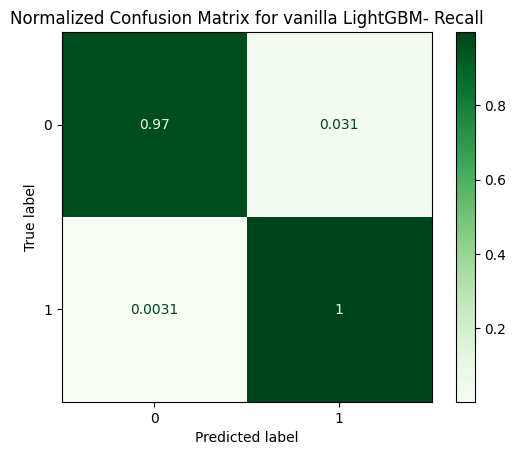

In [232]:
ax = metrics.ConfusionMatrixDisplay.from_estimator(model_LGBM, 
                                                   x_val_imp, 
                                                   y_val_ravel,
                                                   normalize='true', 
                                                   cmap = 'Greens')
plt.title('Normalized Confusion Matrix for vanilla LightGBM- Recall')
plt.show()

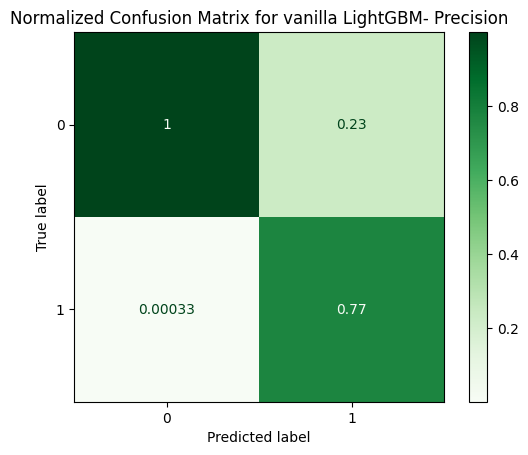

In [231]:
ax = metrics.ConfusionMatrixDisplay.from_estimator(model_LGBM, 
                                                   x_val_imp, 
                                                   y_val_ravel,
                                                   normalize='pred', 
                                                   cmap = 'Greens')
plt.title('Normalized Confusion Matrix for vanilla LightGBM- Precision')
plt.show()

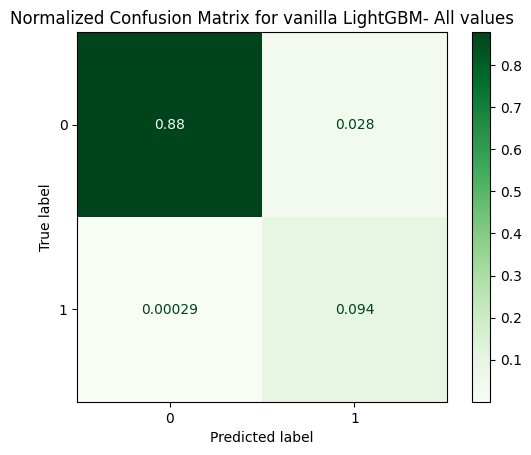

In [230]:
ax = metrics.ConfusionMatrixDisplay.from_estimator(model_LGBM, 
                                                   x_val_imp, 
                                                   y_val_ravel,
                                                   normalize='all', 
                                                   cmap = 'Greens')
plt.title('Normalized Confusion Matrix for vanilla LightGBM- All values')
plt.show()

In [233]:
f1_scores_upsampled = []
n_neighbors_upsampled = []

## Model building

In [48]:
xtrain.describe().T

,count,mean,std,min,25%,50%,75%,max
Column0,785124.0,0.440757,1.163275,0.000000,0.000000,0.000000,0.000000,18.000000
Column1,785133.0,1321.788614,907.267965,-1080.000000,515.000000,1173.000000,2435.000000,2499.000000
Column2,785133.0,2951.279411,2143.140140,-47.000000,1129.000000,2709.000000,4472.000000,10290.000000
Column3,658830.0,-0.000210,0.999935,-2.028572,-0.675216,0.678139,0.678139,0.678139
Column4,657423.0,-0.000855,1.000350,-1.855728,-0.577162,0.701403,0.701403,0.701403
Column5,617953.0,-0.000367,1.015255,-0.007469,-0.007469,-0.007469,-0.007468,551.421127
Column6,781283.0,-0.000709,0.998984,-0.407939,-0.407939,-0.407939,-0.367723,14.985817
Column7,785133.0,0.000727,1.045883,-0.015607,-0.015607,-0.015607,-0.015607,201.687947
Column8,781283.0,-0.000158,1.056769,-0.774979,-0.774979,0.122085,0.625528,323.992484
Column9,52996.0,0.005245,1.111058,-0.088554,-0.086503,-0.081820,-0.063140,133.911803


In [49]:
cat_cols = ['Column10', 'Column11', 'Column12', 'Column13', 'Column19', 'Column20', 'Column21']
num_cols = [x for x in xtrain.columns if x not in cat_cols]

In [50]:
num_cols

['Column0',
 'Column1',
 'Column2',
 'Column3',
 'Column4',
 'Column5',
 'Column6',
 'Column7',
 'Column8',
 'Column9',
 'Column14',
 'Column15',
 'Column16',
 'Column17',
 'Column18']

In [51]:
x_train_imp = imputer.set_params(n_nearest_features = None).fit_transform(x_train)
x_val_imp = imputer.transform(x_val)

In [52]:
x_train_imp.columns

Index(['Column0', 'Column1', 'Column2', 'Column3', 'Column4', 'Column5',
       'Column6', 'Column7', 'Column8', 'Column9', 'Column10', 'Column11',
       'Column12', 'Column13', 'Column14', 'Column15', 'Column16', 'Column17',
       'Column18', 'Column19', 'Column20', 'Column21',
       'missingindicator_Column0', 'missingindicator_Column3',
       'missingindicator_Column4', 'missingindicator_Column5',
       'missingindicator_Column6', 'missingindicator_Column8',
       'missingindicator_Column9', 'missingindicator_Column14',
       'missingindicator_Column15'],
      dtype='object')

In [53]:
y_train_ravel = np.ravel(y_train)
y_val_ravel = np.ravel(y_val)

In [54]:
sc = StandardScaler().set_output(transform='pandas')

In [55]:
x_train_scaled = sc.fit_transform(x_train_imp[num_cols])
x_val_scaled = sc.transform(x_val_imp[num_cols])

In [56]:
x_train_scaled = pd.concat([x_train_scaled, x_train[cat_cols], x_train_imp[x_train_imp.columns[22:]]],  axis = 1)
x_val_scaled = pd.concat([x_val_scaled, x_val[cat_cols], x_val_imp[x_val_imp.columns[22:]]], axis = 1)

In [57]:
x_train_scaled.head()

,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,...,Column21,missingindicator_Column0,missingindicator_Column3,missingindicator_Column4,missingindicator_Column5,missingindicator_Column6,missingindicator_Column8,missingindicator_Column9,missingindicator_Column14,missingindicator_Column15
345112,-0.378582,1.293136,0.121356,0.756461,0.798900,-0.007579,3.449906,-0.016073,0.297306,-0.487926,...,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
375304,-0.378582,1.293136,-0.369503,0.756461,0.798900,-0.007577,-0.409224,-0.016088,0.239298,-0.082461,...,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
269786,-0.378582,-0.985161,-0.348972,0.756461,0.798900,-0.007579,-0.409224,-0.016088,-0.771875,-0.255173,...,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
695103,-0.378582,-0.953197,0.779256,-2.195982,-1.971579,-0.004333,-0.409224,-0.016088,-0.771875,-0.158853,...,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
196000,-0.378582,0.330894,-0.341507,-0.227687,0.798900,-0.007578,-0.409224,-0.016088,0.324320,0.067964,...,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [58]:
x_train_scaled.columns.value_counts()

Column0                      1
Column11                     1
missingindicator_Column14    1
missingindicator_Column9     1
missingindicator_Column8     1
missingindicator_Column6     1
missingindicator_Column5     1
missingindicator_Column4     1
missingindicator_Column3     1
missingindicator_Column0     1
Column21                     1
Column20                     1
Column19                     1
Column13                     1
Column12                     1
Column10                     1
Column1                      1
Column18                     1
Column17                     1
Column16                     1
Column15                     1
Column14                     1
Column9                      1
Column8                      1
Column7                      1
Column6                      1
Column5                      1
Column4                      1
Column3                      1
Column2                      1
missingindicator_Column15    1
Name: count, dtype: int64

In [59]:
model_RF.fit(x_train_scaled, y_train_ravel)
model_XGB.fit(x_train_scaled, y_train_ravel)
model_LGBM.fit(x_train_scaled, y_train_ravel)

model_RF_pred = model_RF.predict(x_val_scaled)
model_XGB_pred = model_XGB.predict(x_val_scaled)
model_LGBM_pred = model_LGBM.predict(x_val_scaled)

RF_precision = metrics.precision_score(y_val_ravel, model_RF_pred)
RF_recall = metrics.recall_score(y_val_ravel, model_RF_pred)
RF_f1 = metrics.f1_score(y_val_ravel, model_RF_pred)

XGB_precision = metrics.precision_score(y_val_ravel, model_XGB_pred)
XGB_recall = metrics.recall_score(y_val_ravel, model_XGB_pred)
XGB_f1 = metrics.f1_score(y_val_ravel, model_XGB_pred)

LGBM_precision = metrics.precision_score(y_val_ravel, model_LGBM_pred)
LGBM_recall = metrics.recall_score(y_val_ravel, model_LGBM_pred)
LGBM_f1 = metrics.f1_score(y_val_ravel, model_LGBM_pred)

In [60]:
print('Max precision:', np.max([RF_precision, XGB_precision, LGBM_precision]), model_list1[1:][np.argmax([RF_precision, XGB_precision, LGBM_precision])])
print('Max recall:', np.max([RF_recall, XGB_recall, LGBM_recall]), model_list1[1:][np.argmax([RF_recall, XGB_recall, LGBM_recall])])
print('Max f1:', np.max([RF_f1, XGB_f1, LGBM_f1]), model_list1[1:][np.argmax([RF_f1, XGB_f1, LGBM_f1])])

Max precision: 0.8475256077995804 XGBClassifier
Max recall: 0.9968933612480584 LGBMClassifier
Max f1: 0.8857575855286492 XGBClassifier


In [61]:
print('Random Forest Precision: ', RF_precision)
print('Random Forest recall: ', RF_recall)
print('Random Forest f1: ', RF_f1)

print()

print('XGBoost Precision: ', XGB_precision)
print('XGBoost recall: ', XGB_recall)
print('XGBoost f1: ', XGB_f1)

print()

print('LGBM Precision: ', LGBM_precision)
print('LGBM recall: ', LGBM_recall)
print('LGBM f1: ', LGBM_f1)

Random Forest Precision:  0.8425612052730697
Random Forest recall:  0.9064631593165394
Random Forest f1:  0.8733448287080717

XGBoost Precision:  0.8475256077995804
XGBoost recall:  0.9276018099547512
XGBoost f1:  0.8857575855286492

LGBM Precision:  0.7720995920075322
LGBM recall:  0.9968933612480584
LGBM f1:  0.8702137067059691


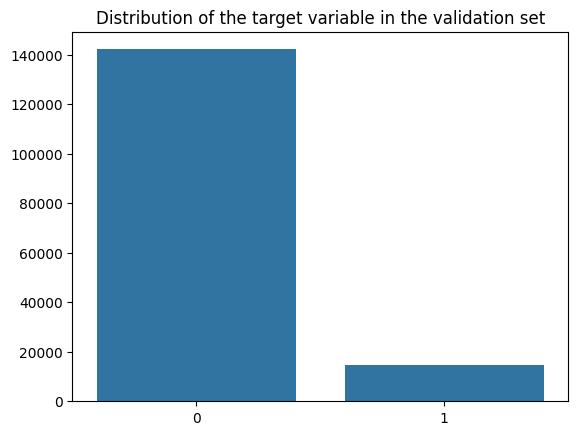

In [62]:
ax = sns.barplot(data = Counter(y_val_ravel))
ax.set_title('Distribution of the target variable in the validation set')
plt.show()

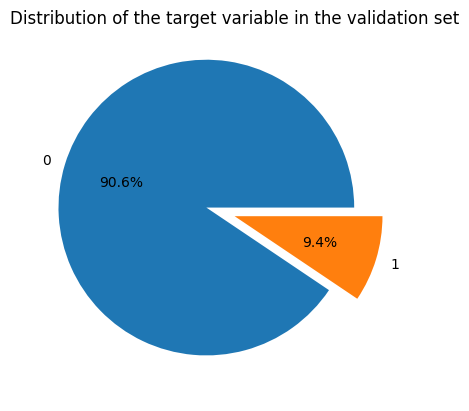

In [63]:
plt.pie(x = Counter(y_val_ravel).values(), 
        labels = Counter(y_val_ravel).keys(), 
        normalize = True, 
        explode = [0.2, 0],
        autopct='%1.1f%%'
        )
plt.title('Distribution of the target variable in the validation set')
plt.show()

In [64]:
adasyn = ADASYN(random_state = seed,
                sampling_strategy = 'minority')

smote = SMOTE(random_state = seed,
              sampling_strategy='minority')

In [65]:
f1_XGB = []
ada_neighbors_XGB = []

f1_LGBM = []
ada_neighbors_LGBM = []

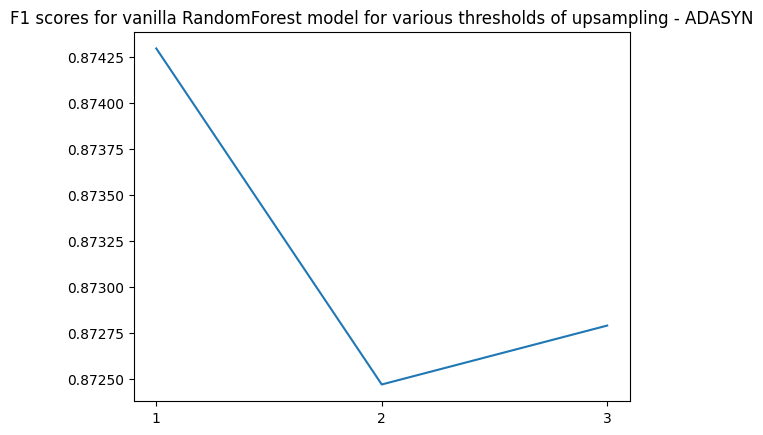

In [66]:
f1_RF = []
ada_neighbors_RF = []

for num in np.linspace(1, 3, 3, dtype = int):
    adasyn.set_params(n_neighbors = num)
    
    x_train_upsampled, y_train_upsampled = adasyn.fit_resample(x_train_scaled, y_train_ravel)

    model_RF.fit(x_train_upsampled, y_train_upsampled)
    model_RF_upsample_pred = model_RF.predict(x_val_scaled)

    RF_upsample_f1 = metrics.f1_score(y_val_ravel, model_RF_upsample_pred)

    f1_RF.append(RF_upsample_f1)
    ada_neighbors_RF.append(num)

ax = sns.lineplot(x = ada_neighbors_RF, y = f1_RF)
ax.set_xticks(np.linspace(1, 3, 3, dtype = int))
ax.set_title('F1 scores for vanilla RandomForest model for various thresholds of upsampling - ADASYN')

plt.show()
    

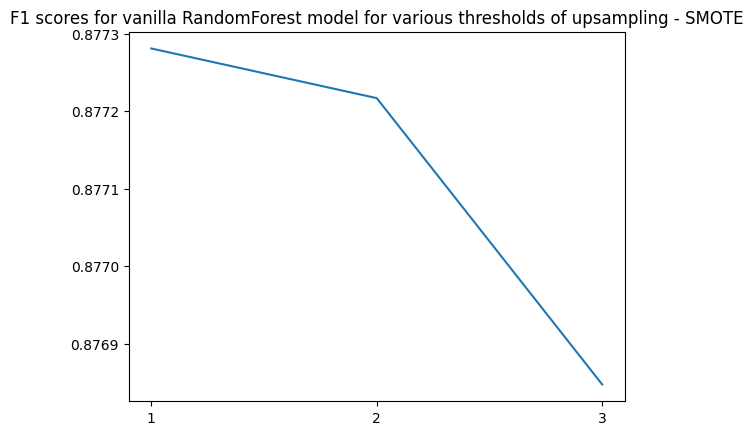

In [67]:
f1_RF = []
smote_neighbors_RF = []

for num in np.linspace(1, 3, 3, dtype = int):
    smote.set_params(k_neighbors = num)
    
    x_train_upsampled, y_train_upsampled = smote.fit_resample(x_train_scaled, y_train_ravel)

    model_RF.fit(x_train_upsampled, y_train_upsampled)
    model_RF_upsample_pred = model_RF.predict(x_val_scaled)

    RF_upsample_f1 = metrics.f1_score(y_val_ravel, model_RF_upsample_pred)

    f1_RF.append(RF_upsample_f1)
    smote_neighbors_RF.append(num)

ax = sns.lineplot(x = smote_neighbors_RF, y = f1_RF)
ax.set_xticks(np.linspace(1, 3, 3, dtype = int))
ax.set_title('F1 scores for vanilla RandomForest model for various thresholds of upsampling - SMOTE')

plt.show()

### SMOTE performs better and in less time, hence we will use SMOTE to upscale the data.

In [68]:
model_smote = []
k_neighbors = []
f1_score_vanilla_model = []

### RandomForest

In [69]:
f1_RF = []
smote_neighbors_RF = []

for num in np.linspace(1, 100, 11, dtype = int):
    smote.set_params(k_neighbors = num)
    
    x_train_upsampled, y_train_upsampled = smote.fit_resample(x_train_scaled, y_train_ravel)

    model_RF.fit(x_train_upsampled, y_train_upsampled)
    model_RF_upsample_pred = model_RF.predict(x_val_scaled)

    RF_upsample_f1 = metrics.f1_score(y_val_ravel, model_RF_upsample_pred)

    f1_RF.append(RF_upsample_f1)
    smote_neighbors_RF.append(num)

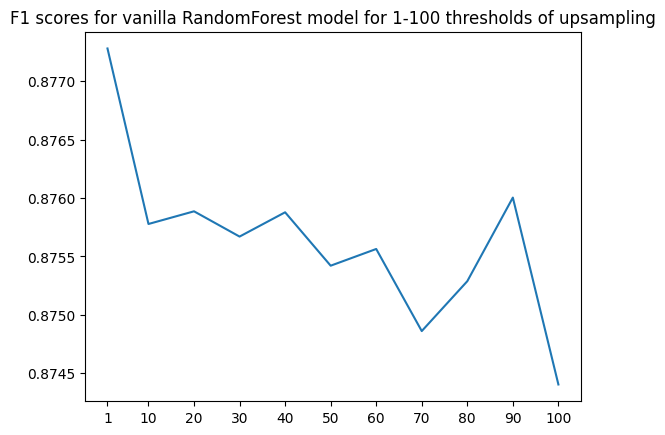

In [70]:
ax = sns.lineplot(x = smote_neighbors_RF, y = f1_RF)
ax.set_xticks(np.linspace(1, 100, 11, dtype = int))
ax.set_title('F1 scores for vanilla RandomForest model for 1-100 thresholds of upsampling')

plt.show()

We will expand the search space over 1-10.

In [71]:
f1_RF = []
smote_neighbors_RF = []

for num in np.linspace(1, 10, 10, dtype = int):
    smote.set_params(k_neighbors = num)
    
    x_train_upsampled, y_train_upsampled = smote.fit_resample(x_train_scaled, y_train_ravel)

    model_RF.fit(x_train_upsampled, y_train_upsampled)
    model_RF_upsample_pred = model_RF.predict(x_val_scaled)

    RF_upsample_f1 = metrics.f1_score(y_val_ravel, model_RF_upsample_pred)

    f1_RF.append(RF_upsample_f1)
    smote_neighbors_RF.append(num)

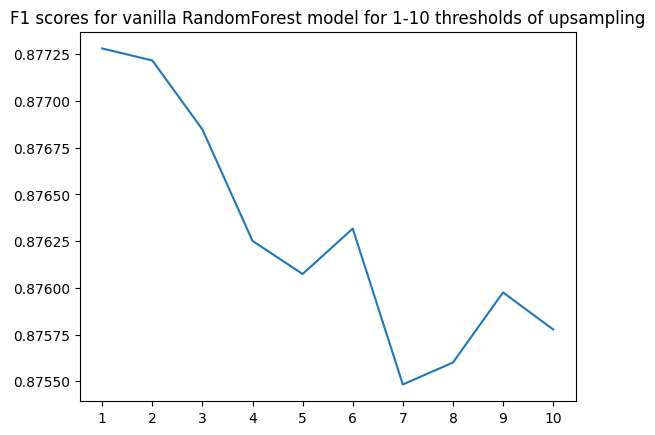

In [72]:
ax = sns.lineplot(x = smote_neighbors_RF, y = f1_RF)
ax.set_xticks(np.linspace(1, 10, 10, dtype = int))
ax.set_title('F1 scores for vanilla RandomForest model for 1-10 thresholds of upsampling')

plt.show()

In [73]:
max_score = max(sorted(zip(f1_RF, smote_neighbors_RF)))

In [74]:
model_smote.append('Random Forest')
k_neighbors.append(max_score[1])
f1_score_vanilla_model.append(max_score[0])

In [75]:
f1_XGB = []
smote_neighbors_XGB = []

for num in np.linspace(1, 100, 11, dtype = int):
    smote.set_params(k_neighbors = num)
    
    x_train_upsampled, y_train_upsampled = smote.fit_resample(x_train_scaled, y_train_ravel)

    model_XGB.fit(x_train_upsampled, y_train_upsampled)
    model_XGB_upsample_pred = model_XGB.predict(x_val_scaled)

    XGB_upsample_f1 = metrics.f1_score(y_val_ravel, model_XGB_upsample_pred)

    f1_XGB.append(XGB_upsample_f1)
    smote_neighbors_XGB.append(num)

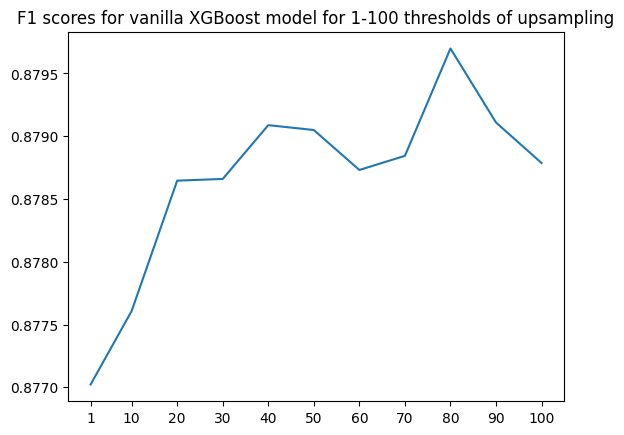

In [76]:
ax = sns.lineplot(x = smote_neighbors_XGB, y = f1_XGB)
ax.set_xticks(np.linspace(1, 100, 11, dtype = int))
ax.set_title('F1 scores for vanilla XGBoost model for 1-100 thresholds of upsampling')

plt.show()

We get maximum F1 scores in between 70-90. Let us expand out search space over it.

In [77]:
f1_XGB = []
smote_neighbors_XGB = []

for num in range(70, 91):
    smote.set_params(k_neighbors = num)
    
    x_train_upsampled, y_train_upsampled = smote.fit_resample(x_train_scaled, y_train_ravel)

    model_XGB.fit(x_train_upsampled, y_train_upsampled)
    model_XGB_upsample_pred = model_XGB.predict(x_val_scaled)

    XGB_upsample_f1 = metrics.f1_score(y_val_ravel, model_XGB_upsample_pred)

    f1_XGB.append(XGB_upsample_f1)
    smote_neighbors_XGB.append(num)

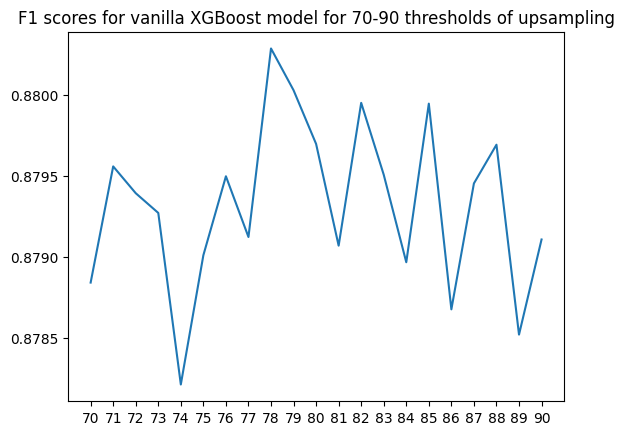

In [78]:
ax = sns.lineplot(x = smote_neighbors_XGB, y = f1_XGB)
ax.set_xticks(range(70, 91))
ax.set_title('F1 scores for vanilla XGBoost model for 70-90 thresholds of upsampling')

plt.show()

In [79]:
max_score = max(sorted(zip(f1_XGB, smote_neighbors_XGB)))
max_score

(0.8802866077663418, 78)

In [80]:
model_smote.append('XGBoost')
k_neighbors.append(max_score[1])
f1_score_vanilla_model.append(max_score[0])

In [81]:
f1_LGBM = []
smote_neighbors_LGBM = []

for num in np.linspace(1, 100, 11, dtype = int):
    smote.set_params(k_neighbors = num)
    
    x_train_upsampled, y_train_upsampled = smote.fit_resample(x_train_scaled, y_train_ravel)

    model_LGBM.fit(x_train_upsampled, y_train_upsampled)
    model_LGBM_upsample_pred = model_LGBM.predict(x_val_scaled)

    LGBM_upsample_f1 = metrics.f1_score(y_val_ravel, model_LGBM_upsample_pred)

    f1_LGBM.append(LGBM_upsample_f1)
    smote_neighbors_LGBM.append(num)

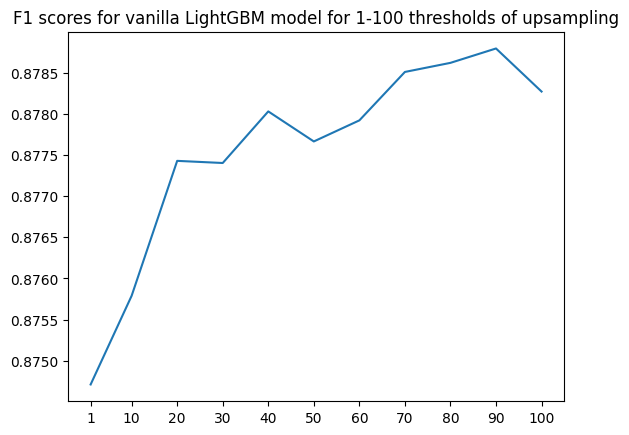

In [82]:
ax = sns.lineplot(x = smote_neighbors_LGBM, y = f1_LGBM)
ax.set_xticks(np.linspace(1, 100, 11, dtype = int))
ax.set_title('F1 scores for vanilla LightGBM model for 1-100 thresholds of upsampling')

plt.show()

We get maximum F1 scores in between 80-100. Let us expand out search space over it.

In [83]:
f1_LGBM = []
smote_neighbors_LGBM = []

for num in range(80, 101):
    smote.set_params(k_neighbors = num)
    
    x_train_upsampled, y_train_upsampled = smote.fit_resample(x_train_scaled, y_train_ravel)

    model_LGBM.fit(x_train_upsampled, y_train_upsampled)
    model_LGBM_upsample_pred = model_LGBM.predict(x_val_scaled)

    LGBM_upsample_f1 = metrics.f1_score(y_val_ravel, model_LGBM_upsample_pred)

    f1_LGBM.append(LGBM_upsample_f1)
    smote_neighbors_LGBM.append(num)

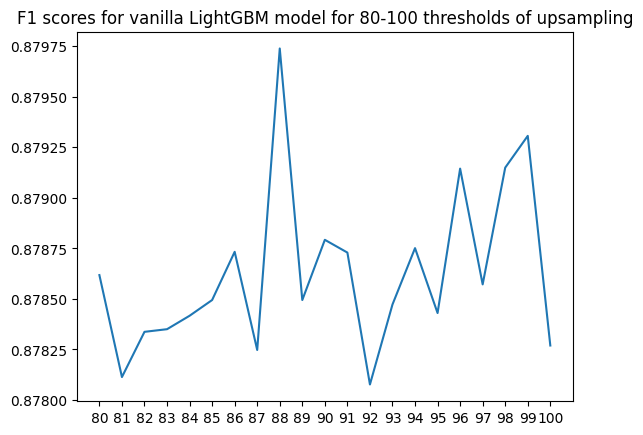

In [84]:
ax = sns.lineplot(x = smote_neighbors_LGBM, y = f1_LGBM)
ax.set_xticks(range(80, 101))
ax.set_title('F1 scores for vanilla LightGBM model for 80-100 thresholds of upsampling')

plt.show()

In [85]:
max_score = max(sorted(zip(f1_LGBM, smote_neighbors_LGBM)))
max_score

(0.8797389964655772, 88)

In [86]:
model_smote.append('LightGBM')
k_neighbors.append(max_score[1])
f1_score_vanilla_model.append(max_score[0])

In [87]:
smote_f1_scores = pd.DataFrame({
    'Model': model_smote,
    'Neighbors': k_neighbors,
    'F1 Score': f1_score_vanilla_model
})

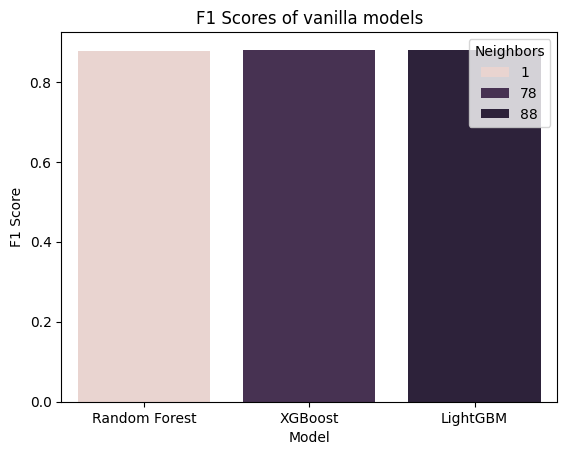

In [88]:
ax = sns.barplot(y=smote_f1_scores['F1 Score'], x = smote_f1_scores['Model'], hue = smote_f1_scores['Neighbors'])
ax.set_title('F1 Scores of vanilla models')
plt.show()

We are getting good F1 scores for each vanilla model.

## Model Building and Optimization

In [89]:
smote_f1_scores

,Model,Neighbors,F1 Score
0,Random Forest,1,0.877281
1,XGBoost,78,0.880287
2,LightGBM,88,0.879739


In [90]:
rf_neighbors   = smote_f1_scores[smote_f1_scores['Model']=='Random Forest']['Neighbors'].values[0]
xgb_neighbors  = smote_f1_scores[smote_f1_scores['Model']=='XGBoost']['Neighbors'].values[0]
lgbm_neighbors = smote_f1_scores[smote_f1_scores['Model']=='LightGBM']['Neighbors'].values[0]

print(rf_neighbors, xgb_neighbors, lgbm_neighbors)

1 78 88


Preparing data for RandomForest Classifier

In [91]:
x_train_upsampled_RF, y_train_upsampled_RF = smote.set_params(k_neighbors = rf_neighbors).fit_resample(x_train_scaled, y_train_ravel)

Preparing data for XGBosot Classifier

In [92]:
x_train_upsampled_XGB, y_train_upsampled_XGB = smote.set_params(k_neighbors = xgb_neighbors).fit_resample(x_train_scaled, y_train_ravel)

Preparing data for LightGBM Classifier

In [93]:
x_train_upsampled_LGBM, y_train_upsampled_LGBM = smote.set_params(k_neighbors = lgbm_neighbors).fit_resample(x_train_scaled, y_train_ravel)

## Hyperparameter Tuning

In [94]:
optuna_model = []
optuna_f1_score = []
optuna_precision_score = []
optuna_recall_score = []

In [95]:
def objective(trial):
    params_rf = {
        'n_estimators': trial.suggest_int('n_estimators', 500, 1000),
        'max_depth': trial.suggest_int('max_depth', 10, 30),
        'min_samples_split': trial.suggest_int('min_samples_split', 10, 30),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2'])
    }

    optuna_RF = RandomForestClassifier(**params_rf, 
                                       random_state = seed, 
                                       n_jobs = -1,
                                       oob_score = True)
    
    optuna_RF.fit(x_train_upsampled_RF, y_train_upsampled_RF)
    optuna_RF_pred = optuna_RF.predict(x_val_scaled)

    score_optuna_RF_F1 = metrics.f1_score(y_val_ravel, optuna_RF_pred)

    return score_optuna_RF_F1

In [96]:
sampler = optuna.samplers.TPESampler(seed = seed)

study = optuna.create_study(direction='maximize', 
                            sampler=sampler)

study.optimize(objective,
               n_trials = 10,
               n_jobs = -1,
               show_progress_bar = True)

  0%|          | 0/10 [00:00<?, ?it/s]

In [97]:
print('F1 score for optimized RandomForest Classifier:', study.best_value)

F1 score for optimized RandomForest Classifier: 0.875860617540062


In [98]:
print('Parameters for optimized RandomForest Classifier:')
print(study.best_params)

Parameters for optimized RandomForest Classifier:
{'n_estimators': 887, 'max_depth': 29, 'min_samples_split': 16, 'max_features': 'sqrt'}


In [99]:
tuned_RF = RandomForestClassifier(**study.best_params, 
                                  random_state = seed, 
                                  n_jobs = -1,
                                  oob_score = True)

tuned_RF.fit(x_train_upsampled_RF, y_train_upsampled_RF)
tuned_RF_pred = tuned_RF.predict(x_val_scaled)

In [100]:
optuna_RF_F1_score = metrics.f1_score(y_val_ravel, tuned_RF_pred)
optuna_RF_precision_score = metrics.precision_score(y_val_ravel, tuned_RF_pred)
optuna_RF_recall_score = metrics.recall_score(y_val_ravel, tuned_RF_pred)

In [101]:
print(f'F1 score after tuning RandomForestClassifier model: {optuna_RF_F1_score}')
print(f'Precision score after tuning RandomForestClassifier model: {optuna_RF_precision_score}')
print(f'Recall score after tuning RandomForestClassifier model: {optuna_RF_recall_score}')

F1 score after tuning RandomForestClassifier model: 0.875860617540062
Precision score after tuning RandomForestClassifier model: 0.7893139698710306
Recall score after tuning RandomForestClassifier model: 0.9837239143648274


In [102]:
optuna_model.append('Random Forest Classifier')
optuna_f1_score.append(optuna_RF_F1_score)
optuna_precision_score.append(optuna_RF_precision_score)
optuna_recall_score.append(optuna_RF_recall_score)

In [103]:
os.makedirs('models')

In [104]:
joblib.dump(tuned_RF, 'models/RandomForestClassifier')

['models/RandomForestClassifier']

In [105]:
def objective(trial):
    params_XGB = {
        'n_estimators': trial.suggest_int('n_estimators', 500, 1000),
        'max_depth': trial.suggest_int('max_depth', 5, 25),
        'eta': trial.suggest_float('eta', 1e-2, 1, log=True),
        'min_child_weight': trial.suggest_int('min_child_weight', 10, 20),
        'subsample': trial.suggest_float('subsample', 0.5, 1, log = True),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1),        
        'gamma': trial.suggest_float('gamma', 0, 1,)
    }

    optuna_XGB = XGBClassifier(**params_XGB, 
                                random_state = seed, 
                                n_jobs = -1)
    
    optuna_XGB.fit(x_train_upsampled_XGB, y_train_upsampled_XGB)
    optuna_XGB_pred = optuna_XGB.predict(x_val_scaled)

    score_optuna_XGB_F1 = metrics.f1_score(y_val_ravel, optuna_XGB_pred)

    return score_optuna_XGB_F1

In [106]:
sampler = optuna.samplers.TPESampler(seed = seed)

study = optuna.create_study(direction='maximize', 
                            sampler=sampler)

study.optimize(objective,
               n_trials = 20,
               n_jobs = -1,
               show_progress_bar = True)

  0%|          | 0/20 [00:00<?, ?it/s]

In [107]:
print('F1 score for optimized XGBoost Classifier:', study.best_value)

F1 score for optimized XGBoost Classifier: 0.8829536046119407


In [108]:
print('Parameters for optimized XGBoost Classifier:')
print(study.best_params)

Parameters for optimized XGBoost Classifier:
{'n_estimators': 506, 'max_depth': 23, 'eta': 0.030879104488804952, 'min_child_weight': 13, 'subsample': 0.968060977976614, 'colsample_bytree': 0.6812388072114376, 'gamma': 0.001602910233087007}


In [109]:
tuned_XGB = XGBClassifier(**study.best_params, 
                          random_state = seed, 
                          n_jobs = -1)

tuned_XGB.fit(x_train_upsampled_XGB, y_train_upsampled_XGB)

tuned_XGB_pred = tuned_XGB.predict(x_val_scaled)

In [110]:
optuna_XGB_F1_score = metrics.f1_score(y_val_ravel, tuned_XGB_pred)
optuna_XGB_precision_score = metrics.precision_score(y_val_ravel, tuned_XGB_pred)
optuna_XGB_recall_score = metrics.recall_score(y_val_ravel, tuned_XGB_pred)

In [111]:
print(f'F1 score after tuning XGBoost Classifier model: {optuna_XGB_F1_score}')
print(f'Precision score after tuning XGBoost Classifier model: {optuna_XGB_precision_score}')
print(f'Recall score after tuning XGBoost Classifier model: {optuna_XGB_recall_score}')

F1 score after tuning XGBoost Classifier model: 0.8829536046119407
Precision score after tuning XGBoost Classifier model: 0.8086385082004044
Recall score after tuning XGBoost Classifier model: 0.972310393732694


In [112]:
optuna_model.append('XGBoost Classifier')
optuna_f1_score.append(optuna_XGB_F1_score)
optuna_precision_score.append(optuna_XGB_precision_score)
optuna_recall_score.append(optuna_XGB_recall_score)

In [113]:
joblib.dump(tuned_XGB, 'models/XGBoostClassifier')

['models/XGBoostClassifier']

In [114]:
def objective(trial):
    params_lgbm = {
        'n_estimators': trial.suggest_int('n_estimators', 500, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 1e-2, 1, log = True),
        'max_depth': trial.suggest_int('max_depth', 5, 25),
        'num_leaves': trial.suggest_int('num_leaves', 20, 100),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 30),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1),
        'subsample': trial.suggest_float('subsample', 0.5, 1) 
    }

    optuna_LGBM = LGBMClassifier(**params_lgbm, 
                                 random_state = seed, 
                                 n_jobs = -1, 
                                 verbosity = 0)

    optuna_LGBM.fit(x_train_upsampled_LGBM, y_train_upsampled_LGBM)
    optuna_LGBM_pred = optuna_LGBM.predict(x_val_scaled)

    score_optuna_LGBM_F1 = metrics.f1_score(y_val_ravel, optuna_LGBM_pred)

    return score_optuna_LGBM_F1

In [115]:
sampler = optuna.samplers.TPESampler(seed = seed)

study = optuna.create_study(direction = 'maximize', 
                            sampler = sampler)

study.optimize(objective,
               n_trials = 20,
               n_jobs = -1,
               show_progress_bar = True)

  0%|          | 0/20 [00:00<?, ?it/s]

In [116]:
print('F1 score for optimized LightGBM Classifier:', study.best_value)

F1 score for optimized LightGBM Classifier: 0.882340301439666


In [117]:
print('Parameters for optimized LightGBM Classifier:')
print(study.best_params)

Parameters for optimized LightGBM Classifier:
{'n_estimators': 730, 'learning_rate': 0.06138874099707035, 'max_depth': 16, 'num_leaves': 90, 'min_child_samples': 20, 'colsample_bytree': 0.7327866021196877, 'subsample': 0.7628583533374511}


In [118]:
tuned_LGBM = LGBMClassifier(**study.best_params, 
                            random_state = seed, 
                            n_jobs = -1, 
                            verbosity = 0)

tuned_LGBM.fit(x_train_upsampled_LGBM, y_train_upsampled_LGBM)
tuned_LGBM_pred = tuned_LGBM.predict(x_val_scaled)

In [119]:
optuna_LGBM_F1_score = metrics.f1_score(y_val_ravel, tuned_LGBM_pred)
optuna_LGBM_precision_score = metrics.precision_score(y_val_ravel, tuned_LGBM_pred)
optuna_LGBM_recall_score = metrics.recall_score(y_val_ravel, tuned_LGBM_pred)

In [120]:
print(f'F1 score after tuning LightGBM Classifier model: {optuna_LGBM_F1_score}')
print(f'Precision score after tuning LightGBM Classifier model: {optuna_LGBM_precision_score}')
print(f'Recall score after tuning LightGBM Classifier model: {optuna_LGBM_recall_score}')

F1 score after tuning LightGBM Classifier model: 0.882340301439666
Precision score after tuning LightGBM Classifier model: 0.808778840742825
Recall score after tuning LightGBM Classifier model: 0.9706220031066387


In [121]:
optuna_model.append('LightGBM Classifier')
optuna_f1_score.append(optuna_LGBM_F1_score)
optuna_precision_score.append(optuna_LGBM_precision_score)
optuna_recall_score.append(optuna_LGBM_recall_score)

In [122]:
joblib.dump(tuned_LGBM, 'models/LightGBMClassifier')

['models/LightGBMClassifier']

In [123]:
log_reg = LogisticRegression(n_jobs = -1, 
                             random_state = seed,
                             solver = 'saga')

estimator_list = [('RandomForest', tuned_RF), 
                  ('XGBoost', tuned_XGB),
                  ('LightGBM', tuned_LGBM)]

In [124]:
def objective(trial):
    params_meta = {
        'C': trial.suggest_float('C', 1e-3, 10, log = True),
        'max_iter': trial.suggest_int('max_iter', 200, 400),
        'penalty': trial.suggest_categorical('penalty', ['l1', 'l2']),
        # 'tol': trial.suggest_float('tol', 1e-4, 1e-2, log = True)
    }

    optuna_stack = StackingClassifier(estimators = estimator_list,
                                      final_estimator = log_reg.set_params(**params_meta),
                                      n_jobs = -1,
                                      cv = 3)
    
    optuna_stack.fit(x_train_scaled, y_train_ravel)
    optuna_stack_pred = optuna_stack.predict(x_val_scaled)
    
    optuna_stack_f1_score = metrics.f1_score(y_val_ravel, optuna_stack_pred)

    return optuna_stack_f1_score

In [125]:
sampler = optuna.samplers.TPESampler(seed = seed)

study = optuna.create_study(direction = 'maximize', 
                            sampler = sampler)

study.optimize(objective,
               n_trials = 5,
               n_jobs = -1,
               show_progress_bar = True)

  0%|          | 0/5 [00:00<?, ?it/s]

In [126]:
print('F1 score for Stacking Classifier:', study.best_value)

F1 score for Stacking Classifier: 0.877947758701316


In [127]:
print('Best parameters for Stacking Classifier\'s meta estimator:')
print(study.best_params)

Best parameters for Stacking Classifier's meta estimator:
{'C': 1.348182940744172, 'max_iter': 324, 'penalty': 'l1'}


In [128]:
stack_clf = StackingClassifier(estimators = estimator_list,
                               final_estimator = log_reg.set_params(**study.best_params),
                               n_jobs = -1,
                               cv = 3)

stack_clf.fit(x_train_scaled, y_train_ravel)
stack_clf_pred = stack_clf.predict(x_val_scaled)

In [129]:
joblib.dump(stack_clf, 'models/StackingClassifier')

['models/StackingClassifier']

In [130]:
stack_clf_f1 = metrics.f1_score(y_val_ravel, stack_clf_pred)
stack_clf_precision_score = metrics.precision_score(y_val_ravel, stack_clf_pred)
stack_clf_recall_score = metrics.recall_score(y_val_ravel, stack_clf_pred)

In [131]:
print('F1 score for Stacking Classifier:', stack_clf_f1)
print('Precision score for Stacking Classifier:', stack_clf_precision_score)
print('Recall score for Stacking Classifier:', stack_clf_recall_score)

F1 score for Stacking Classifier: 0.8779102782509938
Precision score for Stacking Classifier: 0.8685393258426967
Recall score for Stacking Classifier: 0.8874856486796785


In [139]:
optuna_model.append('Stacking Classifier')
optuna_f1_score.append(stack_clf_f1)
optuna_precision_score.append(stack_clf_precision_score)
optuna_recall_score.append(stack_clf_recall_score)

In [133]:
vote_clf = VotingClassifier(estimators = estimator_list,
                            voting = 'soft')

vote_clf.fit(x_train_scaled, y_train_ravel)
vote_clf_pred = vote_clf.predict(x_val_scaled)

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [134]:
joblib.dump(vote_clf, 'models/VotingClassifier')

['models/VotingClassifier']

In [135]:
vote_clf_f1 = metrics.f1_score(y_val_ravel, vote_clf_pred)
vote_clf_precision_score = metrics.precision_score(y_val_ravel, vote_clf_pred)
vote_clf_recall_score = metrics.recall_score(y_val_ravel, vote_clf_pred)

In [136]:
print('F1 score for Voting Classifier:', vote_clf_f1)
print('Precision score for Voting Classifier:', vote_clf_precision_score)
print('Recall score for Voting Classifier:', vote_clf_recall_score)

F1 score for Voting Classifier: 0.887517767153379
Precision score for Voting Classifier: 0.8506409065576815
Recall score for Voting Classifier: 0.9277368812048356


In [140]:
optuna_model.append('Voting Classifier')
optuna_f1_score.append(vote_clf_f1)
optuna_precision_score.append(vote_clf_precision_score)
optuna_recall_score.append(vote_clf_recall_score)

- Check all evaluation metrics on validation data
- Check all evaluation metrics on test data
- Remove extra tuning